# **Emission de CO2 par les véhicules - Regression Modelisation ML**


## 0. Import des modules et sous modules

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api
from scipy.stats import randint

In [58]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.inspection import permutation_importance

from plotly.subplots import make_subplots
from sklearn import preprocessing

In [60]:
from sklearn.linear_model import LinearRegression,RidgeCV, Lasso, LassoCV, ElasticNetCV, Ridge, SGDRegressor, ElasticNet 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor # regressor = DecisionTreeRegressor(random_state=0)
from sklearn.neural_network import MLPRegressor


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report, r2_score, mean_squared_error, root_mean_squared_error

## 1. Import du DataSet et visualisation

In [63]:
data_final = pd.set_option('display.max_row', 111)
data_final = pd.set_option('display.max_column', 111)

In [65]:
data_final = pd.read_csv('df_final.csv')
df_final = data_final.copy()

In [66]:
df_final.head()

,Class_CO2,PuissanceMaximale_kW,masseVideEuroMax_kg,CO2_g_par_km,Marque_ALFA-ROMEO,Marque_ASTON MARTIN,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_DACIA,Marque_DANGEL,Marque_FERRARI,Marque_FIAT,Marque_FORD,Marque_HONDA,Marque_HYUNDAI,Marque_INFINITI,Marque_JAGUAR,Marque_JAGUAR LAND ROVER LIMITED,Marque_JEEP,Marque_KIA,Marque_LADA,Marque_LAMBORGHINI,Marque_LANCIA,Marque_LAND ROVER,Marque_LEXUS,Marque_LOTUS,Marque_MASERATI,Marque_MAYBACH,Marque_MAZDA,Marque_MERCEDES,Marque_MERCEDES AMG,Marque_MERCEDES-BENZ,Marque_MINI,Marque_MITSUBISHI,Marque_NISSAN,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_QUATTRO,Marque_RENAULT,Marque_RENAULT TECH,Marque_ROLLS-ROYCE,Marque_SEAT,Marque_SKODA,Marque_SMART,Marque_SSANGYONG,Marque_SUBARU,Marque_SUZUKI,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO,Carburant_C_autre,Carburant_ES,Carburant_GO,Hybride_non,Hybride_oui,BoîteDeVitesse_Auto,BoîteDeVitesse_BV_autre,BoîteDeVitesse_M,Carrosserie_BERLINE,Carrosserie_BREAK,Carrosserie_CABRIOLET,Carrosserie_COMBISPACE,Carrosserie_COUPE,Carrosserie_MINIBUS,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-SUPER,gamme_SUPERIEURE
0,E,0.544329,-1.809856,182.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,C,0.071365,-1.667545,136.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,C,-0.466095,-1.667545,134.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,C,-0.466095,-1.667545,134.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,C,0.071365,-1.667545,139.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [67]:
df_final = df_final.drop('Class_CO2', axis = 1) # suppression de la variable cible "Class_CO2" destinée à la classification

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98454 entries, 0 to 98453
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PuissanceMaximale_kW              98454 non-null  float64
 1   masseVideEuroMax_kg               98454 non-null  float64
 2   CO2_g_par_km                      98454 non-null  float64
 3   Marque_ALFA-ROMEO                 98454 non-null  bool   
 4   Marque_ASTON MARTIN               98454 non-null  bool   
 5   Marque_AUDI                       98454 non-null  bool   
 6   Marque_BENTLEY                    98454 non-null  bool   
 7   Marque_BMW                        98454 non-null  bool   
 8   Marque_CADILLAC                   98454 non-null  bool   
 9   Marque_CHEVROLET                  98454 non-null  bool   
 10  Marque_CITROEN                    98454 non-null  bool   
 11  Marque_DACIA                      98454 non-null  bool   
 12  Marq

## 2. TrainTest 

In [74]:
# Créons un objet y contenant la variable cible CO2_g_par_km et un object X contenant le reste des variables
X = df_final.drop('CO2_g_par_km', axis=1)
y = df_final['CO2_g_par_km']

In [76]:
# Séparons les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\232896332.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='y_train')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\232896332.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

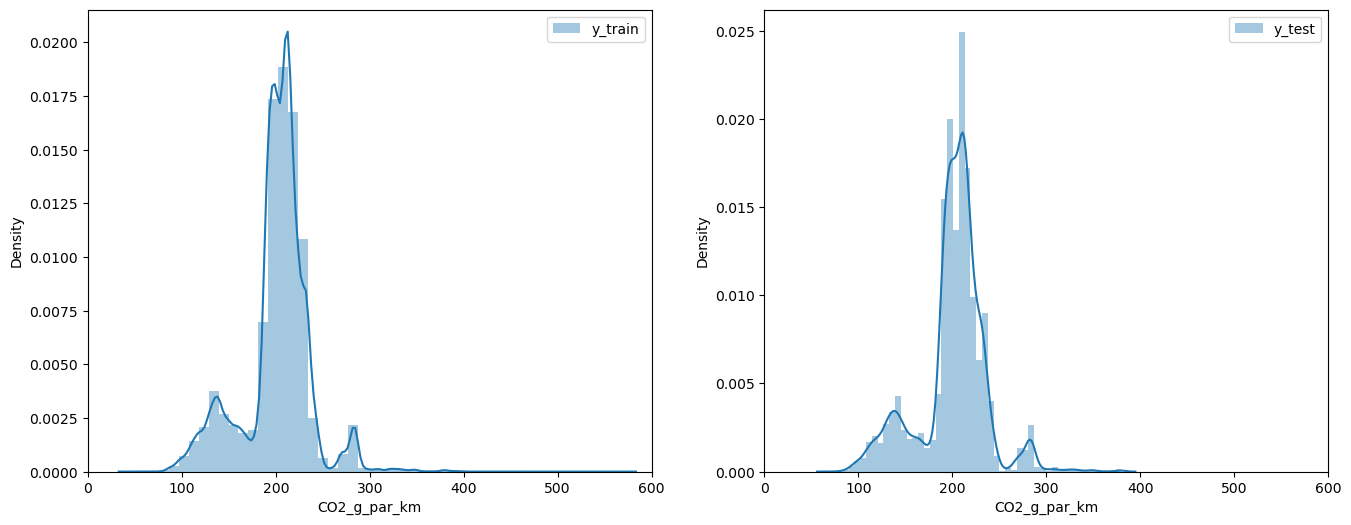

In [78]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
sns.distplot(y_train, label='y_train')
plt.xlim(0, 600)
plt.legend()

#plt.plot(t2, f(t2), "k")

plt.subplot(122)
sns.distplot(y_test, label='y_test')
plt.xlim(0, 600)
plt.legend()

## 3. Modelisation

##### Dans cette partie, il s'agit de dévélopper un modèle de regression. Pour celà, nous allons procedé de la façon suivante: Pour commencer, nous allons entrainer tout plein de modèles différents et retenir celui ou ceux qui auront la meilleure performance. Ensuite nous tenterons d'ameliorer leur performance en optimisant leurs hyperparametres grace à un série de plusieurs algorithme <<RandomizedSearchCV>>. Enfin dans la dernière partie, il s'agira d'utiliser les apprentissages d'ensemble comme le bagging ou le boosting pour essayer d'avoir de meilleurs scores.

##### Dans la mesure de mieux comprendre ces modèles, nous utiliserons trois metrics pour évaluer ces modèles : le **Score**, la **MSE** et en fin les **learning_curve**

- ##### Le Score nous permet de caractériser la capacité de prédiction du modèle. C'est à dire sa capacité d'estimation d'un resultat avec une probabilité de confiance. Cette valeur est comprise entre 0 et 1. Le modèle présente un bon score lorsque sa valeur est proche de 1 ou 100%.

- ##### La MSE évalue la moyenne des erreurs quadratiques, représentant la différence quadratique moyenne entre les valeurs estimées par le modèle et les valeurs réelles. Elle indique l'importance de la part de la variance qui peut être expliquée par les variables indépendantes. Plus la variance peut être expliquée, meilleur est le modèle de régression.

- ##### les courbes d'apprentissage montrent la relation entre le score de formation et le score de test validé par croisement pour un estimateur avec un nombre variable d'échantillons de formation. Cela à pour but de visualiser les courbes d'apprentissage sur les données d'entrainement et les données de validation. l'analyse de ses courbes permet de savoir si le modèle arrive à généraliser ou pas sur les données de de validation.

### 3.1 Model linéaire

##### Le modèle de régression linéaire est est un algorithme d’apprentissage supervisé qui permet de trouver une relation entre une ou plusieurs entités (variables indépendantes) et une variable cible continue (variable dépendante). Lorsqu’il n’y a qu’une entité, elle est appelée Régression linéaire à une variable et s’il existe plusieurs entités, elle est appelée Régression linéaire multiple. Dans cette partie du projet il s'agit d'appliquer un ensemble de modèles linéaire sur notre dataset: **Regression Lineaire Multiple**, **Regression Linéaire pénaliusée (Ridge et Lasso)** et enfin la **regression linéaire Elastic Net**.

#### 3.1.1 Model linéaire multiple



#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [84]:
# Instanciation du regresseur Lr de la classe LinearRegression
lr_df_final = LinearRegression()
# Entrainement du modèle sur l'ensemble d'entrainement (X_train, y_train)
lr_df_final.fit(X_train, y_train)

LinearRegression()

In [86]:
# Affichage de l'intercept ainsi que des coefficients de chaque variable estimée par le modèle
coeffs = list(lr_df_final.coef_)

coeffs.insert(0, lr_df_final.intercept_)

feats = list(X.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,-6.929670e+11
PuissanceMaximale_kW,-4.111825e-01
masseVideEuroMax_kg,2.624658e+00
Marque_ALFA-ROMEO,-8.368641e+10
Marque_ASTON MARTIN,-8.368641e+10
Marque_AUDI,-8.368641e+10
Marque_BENTLEY,-8.368641e+10
Marque_BMW,-8.368641e+10
Marque_CADILLAC,-8.368641e+10
Marque_CHEVROLET,-8.368641e+10


In [88]:
# Affichage du score (R²) du modèle sur l'échantillon d'apprentissage.

print('Coefficient de détermination du modèle sur les données train :', lr_df_final.score(X_train, y_train))
print('Coefficient de détermination du modèle sur les données test :', lr_df_final.score(X_test, y_test))

# Affichage du score obtenu par validation croisée grâce à la fonction cross_val_score()
print('Coefficient de détermination obtenu par Cv :', cross_val_score(lr_df_final,X_train,y_train).mean())

Coefficient de détermination du modèle sur les données train : 0.7687969151991052
Coefficient de détermination du modèle sur les données test : 0.7769957388252574
Coefficient de détermination obtenu par Cv : -63851706651.57977


##### Le score obtenu sur l'ensemble de test est supérieur aux scores obtenus sur l'ensemble d'entrainement par validation croisée. Cela suggère un problème de sur-apprentissage (overfitting). En général, le score de test est inférieur au score d’entraînement car le modèle s’adapte aux données d'entrainement et n'a jamais vu les données de test. Cependant la différence ne doit être trop significative car le modèle doit pouvoir se généraliser à d'autres données. Les resultats montrent que le modèle apprend trop parfaitement et est même plus performant sur les resusltats qu'il n'a jamais vu.

##### Il est important de noter que la régression linéaire est fondée sur les hypothèses suivantes : **centrage**, **homoscédasticité**, **indépendance** et **normalité** des erreurs. Pour vérifier ces hypothèses nous traçons les residus (Y_pred-y) et le Q-Q plot pour évaluer la normalité des résidus. On observe que les points sont répartis uniformément autour de la droite d'équation 𝑦=0 car la moyenne des résidus avoisine 0 et les resultats sur les  Q-Q plot pour évaluer la normalité des résidus (une fois centrés et réduits) sont normaux sur la plage de quantile théorique [-2, 3]. la normalité n'est pas vérifiée aux extrémité. 

Text(0.5, 1.0, 'residus')

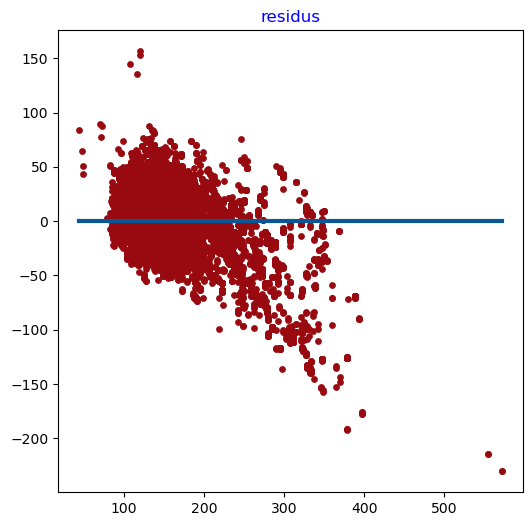

In [91]:
# Calcul des valeurs ajustées (pred_train) puis les résidus (residus) du modèle
pred_train = lr_df_final.predict(X_train)
residus = pred_train - y_train
plt.figure(figsize=(6,6))
# Affichage de nuage des points représentant les résidus en fonction des valeurs de y_train
plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')
plt.title("residus", fontdict={"color" : "blue"})

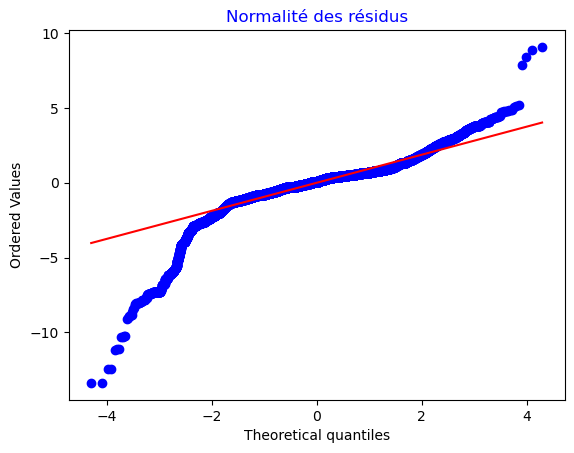

In [93]:
# Traçons maintenant un Q-Q plot pour évaluer la normalité des résidus (une fois centrés et réduits)

residus_norm = (residus-residus.mean())/residus.std()

# Affichage le QQ-Plot en appliquant la fonction stats.probplot à residus_norm
# Ajout de l'argument plot=plt pour pouvoir l'afficher avec matplotlib grâce à la commande plt.show()

stats.probplot(residus_norm, plot=plt)
plt.title("Normalité des résidus", fontdict={"color" : "blue"})
plt.show()

In [95]:
# Calculons les mean_squared_error des train et test 

pred_test = lr_df_final.predict(X_test)
print('mse train :', mean_squared_error(pred_train, y_train))
print('mse test :', mean_squared_error(pred_test, y_test))

mse train : 296.3385580646058
mse test : 286.757170586055


##### On constate que l'erreur entre l'échantillon d'entrainement et l'échantillon de test n'est pas grande. Nous notons une différence de 10. Ce resultat semble prouver que le modèle n'est pas en overfitting. L'nterpretationn des courbes d'apprentissage permettra de conclure sur la capacité du modèle à généraliser.

C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\1793829930.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Reg Lin Mul')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\1793829930.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

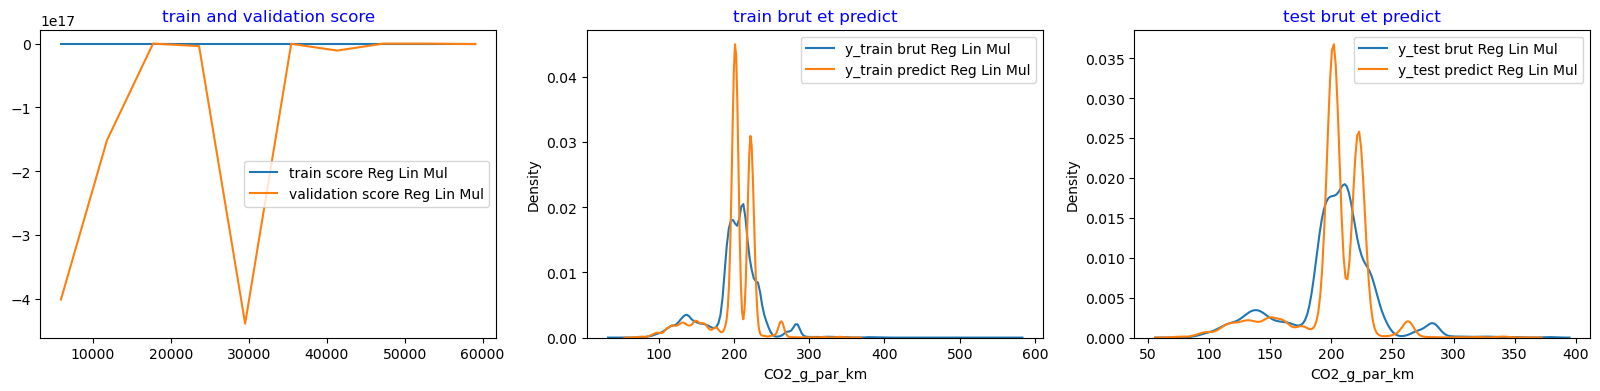

In [98]:
plt.figure(figsize=(20, 4))

# representation des courbes d'apprentissage
plt.subplot(131)

N, train_score_RL, val_score_RL = learning_curve(lr_df_final, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))  

#plt.figure(figsize=(8, 4))
plt.plot(N, train_score_RL.mean(axis=1), label='train score Reg Lin Mul')
plt.plot(N, val_score_RL.mean(axis=1), label='validation score Reg Lin Mul')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()


# Calcul
pred_test = lr_df_final.predict(X_test)
y_train_RL = pd.DataFrame(pred_train)
y_test_RL = pd.DataFrame(pred_test)


# Representation entre CO2 predit et CO2 brut
plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut Reg Lin Mul')
sns.distplot(y_train_RL, hist=False, label='y_train predict Reg Lin Mul')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test brut Reg Lin Mul')
sns.distplot(y_test_RL, hist=False, label='y_test predict Reg Lin Mul')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()

##### On voit toute suite que notre modèle est en overfitting. Car le modèle a un score de 100% sur les données du train set, donc il a parfaitement appris ses leçons, il est OK sur le train set, par contre il est incapable de généraliser sur de nouveaux cas. Quand on lui montre les données du validation set, c'est à dire les données qu'il n'a pas vu durant son entrainement, et bien, on obtient une performance beaucoup moins bonne. Un comportement completement sacadé qui monte rapidement jusq'atteindre le train score à un certain point.

##### Il est important de noter que La régression linéaire multiple est plus robuste que la régression linéaire simple. En effet elle permet de prédire une variable cible à partir de plusieurs variables explicatives contenant des informations. Cependant l'utilisation d'un grand nombre de variables explicatives (comme dans notre cas) augmente la dimension du dataframe et favorise donc l'overfitting.

##### Dans le but de luter contre cette overfitting, Nous allons nous interesser à d'autres types de modèles de régression linéaires multiples spécifiques peu sensibles à l'overfitting : les modèles pénalisés.  

#### 3.1.2 Model linéaire Pénalisé Ridge

#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [101]:
# Creation du modèle de regression Ridge qui choisira le meilleur aplha parmi (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100)
rdg_df_final = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
rdg_df_final.fit(X_train, y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

In [103]:
# Affichons l'alpha retenu par le modèle et le R2 sur l'ensemble d'entrainement
print('alpha sélectionné par c-v :', rdg_df_final.alpha_)
print('score train :', rdg_df_final.score(X_train, y_train))
print('score test :', rdg_df_final.score(X_test, y_test))

# Calculons les MSE

rdg_pred_train = rdg_df_final.predict(X_train)
rdg_pred_test = rdg_df_final.predict(X_test)
print('mse train :', mean_squared_error(rdg_pred_train, y_train))
print('mse test :', mean_squared_error(rdg_pred_test, y_test))

alpha sélectionné par c-v : 0.1
score train : 0.7687965234754434
score test : 0.7770011635044408
mse train : 296.3390601462507
mse test : 286.7501950886103


##### On constate les mêmes resultats sur les Scores et les MSE (Mean Square Error) que ceux de la regression multiple.

C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2821984742.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Ridge')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2821984742.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

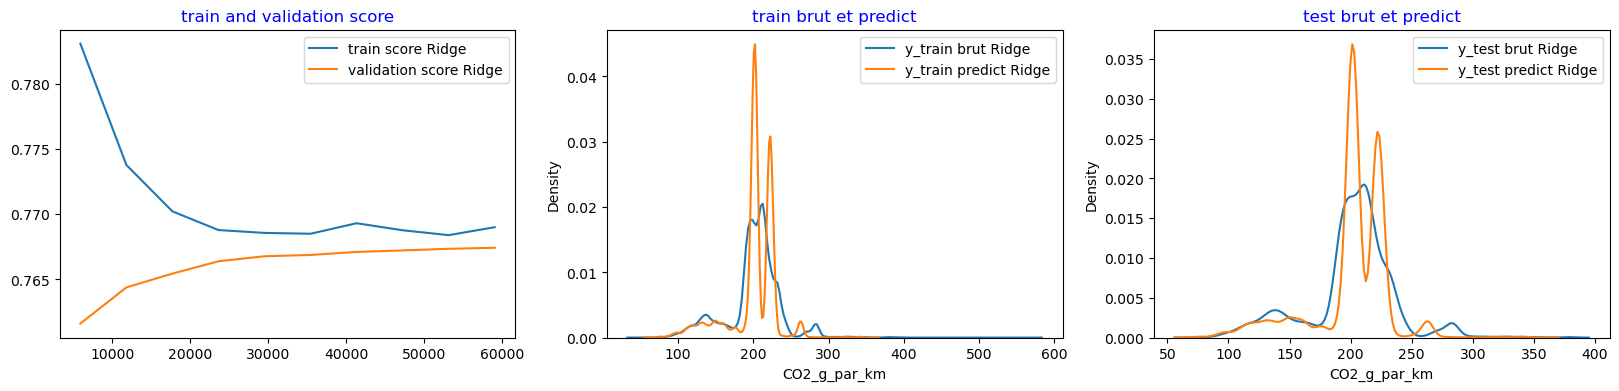

In [105]:
# representation des courbes d'apprentissage
plt.figure(figsize=(20, 4))



plt.subplot(131)

N, train_score_Ridge, val_score_Ridge = learning_curve(rdg_df_final, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   
#plt.figure(figsize=(8, 4))
plt.plot(N, train_score_Ridge.mean(axis=1), label='train score Ridge')
plt.plot(N, val_score_Ridge.mean(axis=1), label='validation score Ridge')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()

# Calcul

y_train_Ridge = pd.DataFrame(rdg_pred_train)
y_test_Ridge = pd.DataFrame(rdg_pred_test)

# Representation entre CO2 predit et CO2 brut
plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut Ridge')
sns.distplot(y_train_Ridge, hist=False, label='y_train predict Ridge')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test brut Ridge')
sns.distplot(y_test_Ridge, hist=False, label='y_test predict Ridge')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()


##### En analysant un tout petit peu ces courbes d'apprentissages, on constate que les deux courbes convergent l'une vers l'autre et ont tendance à reduire l'écart entre elles. Cela semble indiquer que le modèle Ridge n'est pas en overfitting. Par contre, la comparaison entre les valeurs brutes et les valeur prédites de la variable cible montre bien que le modèle à du mal à généraliser sur les echantillons de test, même si elle y arrive sur quelques points.  

#### 3.1.3 Model linéaire Pénalisé Lasso

#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [116]:
 # Creation du modèle de regression Lasso qui choisira le meilleur aplha 
lass_df_final = LassoCV(cv = 10)
lass_df_final.fit(X_train, y_train)

LassoCV(cv=10)

In [118]:
# Affichons l'alpha retenu par le modèle et le R2 sur l'ensemble d'entrainement

print('les alphas sélectionné par c-v :', lass_df_final.alphas_)
print("----------------------------Score et alpha selectionné--------------------------------------------------------------------------------------------------")
print('score train :', lass_df_final.score(X_train, y_train))
print('score test :', lass_df_final.score(X_test, y_test))
print('alpha sélectionné par c-v :', lass_df_final.alpha_)

print("-----------------------------MSE-------------------------------------------------------------------------------------------------")

lass_pred_train = lass_df_final.predict(X_train)
lass_pred_test = lass_df_final.predict(X_test)
print('mse train :', mean_squared_error(lass_pred_train, y_train))
print('mse test :', mean_squared_error(lass_pred_test, y_test))

les alphas sélectionné par c-v : [13.35348978 12.45350926 11.61418442 10.83142726 10.10142532  9.42062306
  8.78570459  8.19357751  7.64135781  7.12635587  6.64606333  6.19814091
  5.78040695  5.39082687  5.02750318  4.6886663   4.37266588  4.07796283
  3.80312179  3.54680411  3.30776138  3.08482933  2.87692216  2.68302724
  2.50220018  2.33356026  2.17628611  2.02961171  1.89282268  1.76525276
  1.64628063  1.53532683  1.43185094  1.33534898  1.24535093  1.16141844
  1.08314273  1.01014253  0.94206231  0.87857046  0.81935775  0.76413578
  0.71263559  0.66460633  0.61981409  0.5780407   0.53908269  0.50275032
  0.46886663  0.43726659  0.40779628  0.38031218  0.35468041  0.33077614
  0.30848293  0.28769222  0.26830272  0.25022002  0.23335603  0.21762861
  0.20296117  0.18928227  0.17652528  0.16462806  0.15353268  0.14318509
  0.1335349   0.12453509  0.11614184  0.10831427  0.10101425  0.09420623
  0.08785705  0.08193578  0.07641358  0.07126356  0.06646063  0.06198141
  0.05780407  0.05

([<matplotlib.axis.XTick at 0x1579b9fdb50>,
 [Text(0, 0, 'PuissanceMaximale_kW'),
  Text(1, 0, 'masseVideEuroMax_kg'),
  Text(2, 0, 'Marque_ALFA-ROMEO'),
  Text(3, 0, 'Marque_ASTON MARTIN'),
  Text(4, 0, 'Marque_AUDI'),
  Text(5, 0, 'Marque_BENTLEY'),
  Text(6, 0, 'Marque_BMW'),
  Text(7, 0, 'Marque_CADILLAC'),
  Text(8, 0, 'Marque_CHEVROLET'),
  Text(9, 0, 'Marque_CITROEN'),
  Text(10, 0, 'Marque_DACIA'),
  Text(11, 0, 'Marque_DANGEL'),
  Text(12, 0, 'Marque_FERRARI'),
  Text(13, 0, 'Marque_FIAT'),
  Text(14, 0, 'Marque_FORD'),
  Text(15, 0, 'Marque_HONDA'),
  Text(16, 0, 'Marque_HYUNDAI'),
  Text(17, 0, 'Marque_INFINITI'),
  Text(18, 0, 'Marque_JAGUAR'),
  Text(19, 0, 'Marque_JAGUAR LAND ROVER LIMITED'),
  Text(20, 0, 'Marque_JEEP'),
  Text(21, 0, 'Marque_KIA'),
  Text(22, 0, 'Marque_LADA'),
  Text(23, 0, 'Marque_LAMBORGHINI'),
  Text(24, 0, 'Marque_LANCIA'),
  Text(25, 0, 'Marque_LAND ROVER'),
  Text(26, 0, 'Marque_LEXUS'),
  Text(27, 0, 'Marque_LOTUS'),
  Text(28, 0, 'Marque_MASERA

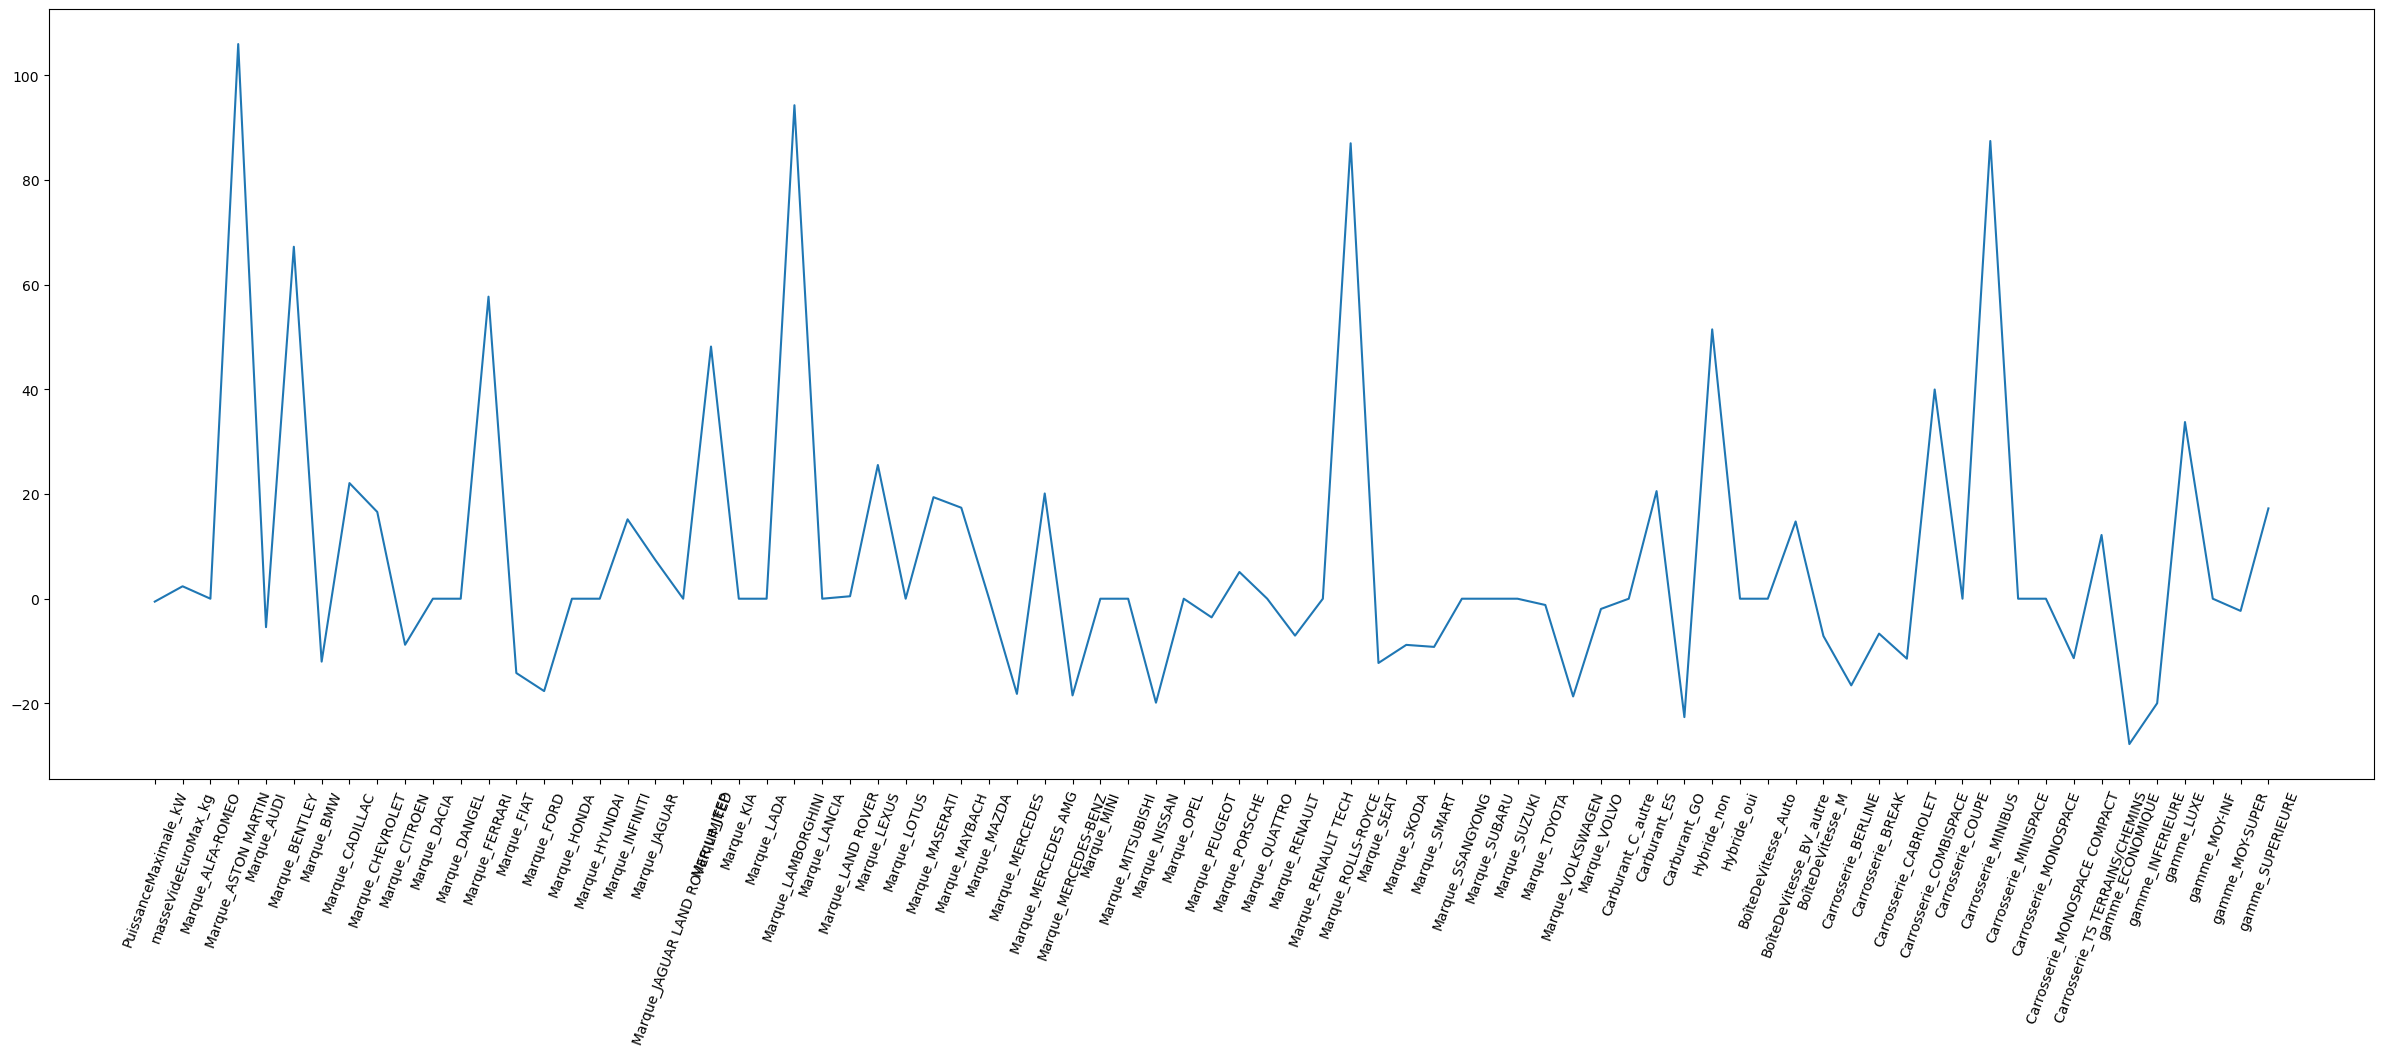

In [120]:
# Représentation des valeurs estimés du coefficient pour chaque variable de X.

lasso_coef = lass_df_final.coef_
plt.figure(figsize=(30,10))
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=70)

##### L'intérêt principal de la régression Lasso, par rapport à la régression Ridge, est qu'elle peut faire office de dispositif de sélection de variables en annulant certains coefficients beta. En effet certaines variables voient leur coefficient estimé nuls. Elles sont de facto exclues du modèle prédictif. l'objectif de ce graphe est de vérifier si l'une des variables a été laissé par le modèle.

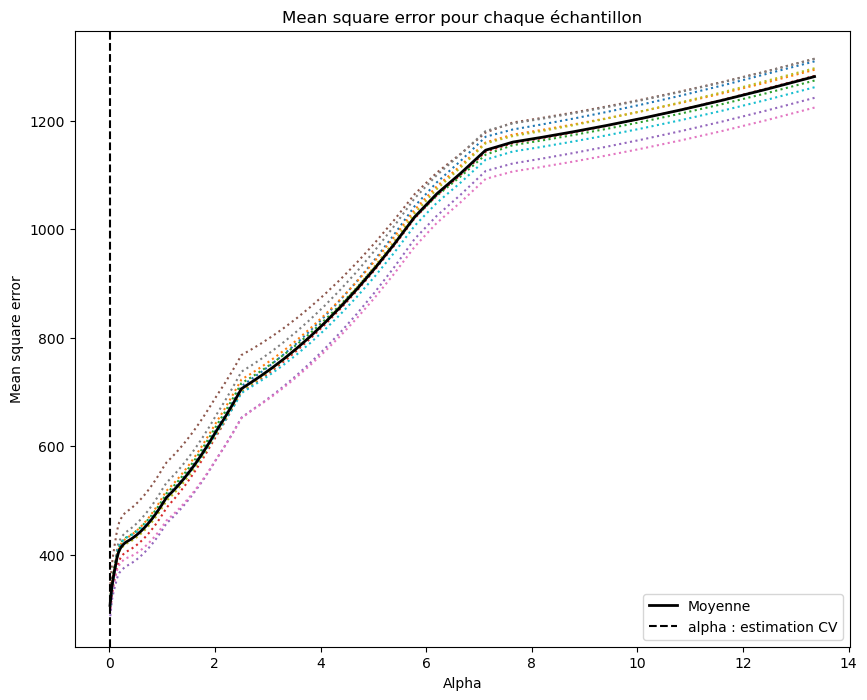

In [123]:
# representation graphique du Mean square error pour chaque échantillon

alphas = lass_df_final.alphas_

plt.figure(figsize = (10, 8))

plt.plot(alphas, lass_df_final.mse_path_, ':')
plt.plot(alphas, lass_df_final.mse_path_.mean(axis = 1), 'k', label = 'Moyenne', linewidth = 2)

plt.axvline(lass_df_final.alpha_, linestyle = '--', color = 'k', label = 'alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend()

C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\3224186845.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Lasso')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\3224186845.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

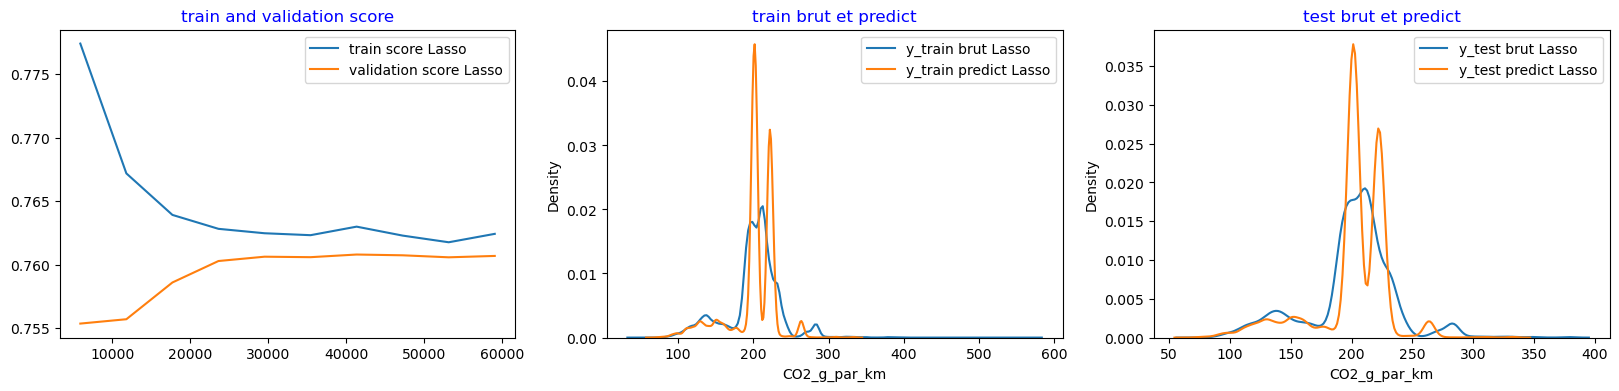

In [125]:
# representation des courbes d'apprentissage
plt.figure(figsize=(20, 4))

plt.subplot(131)

N, train_score_Lasso, val_score_Lasso = learning_curve(lass_df_final, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   
#plt.figure(figsize=(8, 4))
plt.plot(N, train_score_Lasso.mean(axis=1), label='train score Lasso')
plt.plot(N, val_score_Lasso.mean(axis=1), label='validation score Lasso')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()


# Calcul

y_train_Lasso = pd.DataFrame(lass_pred_train)
y_test_Lasso = pd.DataFrame(lass_pred_test)

# Representation entre CO2 predit et CO2 brut
plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut Lasso')
sns.distplot(y_train_Lasso, hist=False, label='y_train predict Lasso')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test brut Lasso')
sns.distplot(y_test_Lasso, hist=False, label='y_test predict Lasso')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()

##### les courbes d'apprentissage du modèle Lasso semblent avoir le même comportement de celles du modèle Ridge même si les scores sont legèrement inférieurs à ceux du modèle Ridge

##### Les courbes d'apprentissages du modèle Lasso semblent nous indiquer qu'il n'est pas en over fitting. On constate que contrairement au modèle lineaire, le Lasso n'arrive pas à généraliser à 100% sur le train. On constate d'ailleurs que le train shute legerement vers la fin, mais ce n'est pas trop grave, le plus important c'est d'avoir un ecart reduit entre le train score et le validation score. Le score de validation croit petit à petit pour se rapprocher du train en reduisant l'écart entre les deux courbes d'apprentissage(train et test). Par contre, lorsqu'on represente les valeurs brutes et les valeurs prédites, on remarque que le modèle a completement du mal à généraliser sur la majorité des points.

##### Notons qu'il existe d'autres modèles de régression linéaire pénalisés. Il existe notamment un modèle qui combine Ridge et Lasso avec à la fois une pénalité L1 et une pénalité L2. Il s'agit du modèle Elastic Net, qui fera l'objet du prochain modèle à tester.

#### 3.1.4 Model linéaire Pénalisé Elastic Net

In [130]:
l1_ratio_EN=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99)
alphas_EN=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

elast_df_final = ElasticNetCV(cv=10, l1_ratio = l1_ratio_EN, alphas = alphas_EN)
elast_df_final.fit(X_train, y_train)

C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113798.88260899112, tolerance: 9063.790142013944
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87798.10015370324, tolerance: 9075.708239027445
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86553.7360567078, tolerance: 9091.260353758145
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: Co

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=10, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [131]:
# Affichons l'intercept et les coefficients estimés pour chaque variable de X.

coeffs = list(elast_df_final.coef_)
coeffs.insert(0, elast_df_final.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,131.869688
PuissanceMaximale_kW,-0.437263
masseVideEuroMax_kg,2.595528
Marque_ALFA-ROMEO,-1.321697
Marque_ASTON MARTIN,115.882053
Marque_AUDI,-8.044053
Marque_BENTLEY,90.986921
Marque_BMW,-13.079063
Marque_CADILLAC,37.008817
Marque_CHEVROLET,24.477680


In [134]:
# Affichons l'alpha retenu par le modèle et le R2 sur l'ensemble d'entrainement
print('les alphas sélectionné par c-v :', elast_df_final.alphas_)

print("-----------------------------------Score-------------------------------------------------------------------------------------------")

print('score train :', elast_df_final.score(X_train, y_train))
print('score test :', elast_df_final.score(X_test, y_test))
print('alpha sélectionné par c-v :', elast_df_final.alpha_)


print("------------------------------------MSE-----------------------------------------------------------------------------------------")
# Calculons les MSE

elast_pred_train = elast_df_final.predict(X_train)
elast_pred_test = elast_df_final.predict(X_test)
print('mse train :', mean_squared_error(elast_pred_train, y_train))
print('mse test :', mean_squared_error(elast_pred_test, y_test))

les alphas sélectionné par c-v : [1.    0.8   0.5   0.25  0.1   0.05  0.025 0.02  0.01  0.001]
-----------------------------------Score-------------------------------------------------------------------------------------------
score train : 0.7686365845202815
score test : 0.7768907690780273
alpha sélectionné par c-v : 0.001
------------------------------------MSE-----------------------------------------------------------------------------------------
mse train : 296.5440577542706
mse test : 286.8921492970189


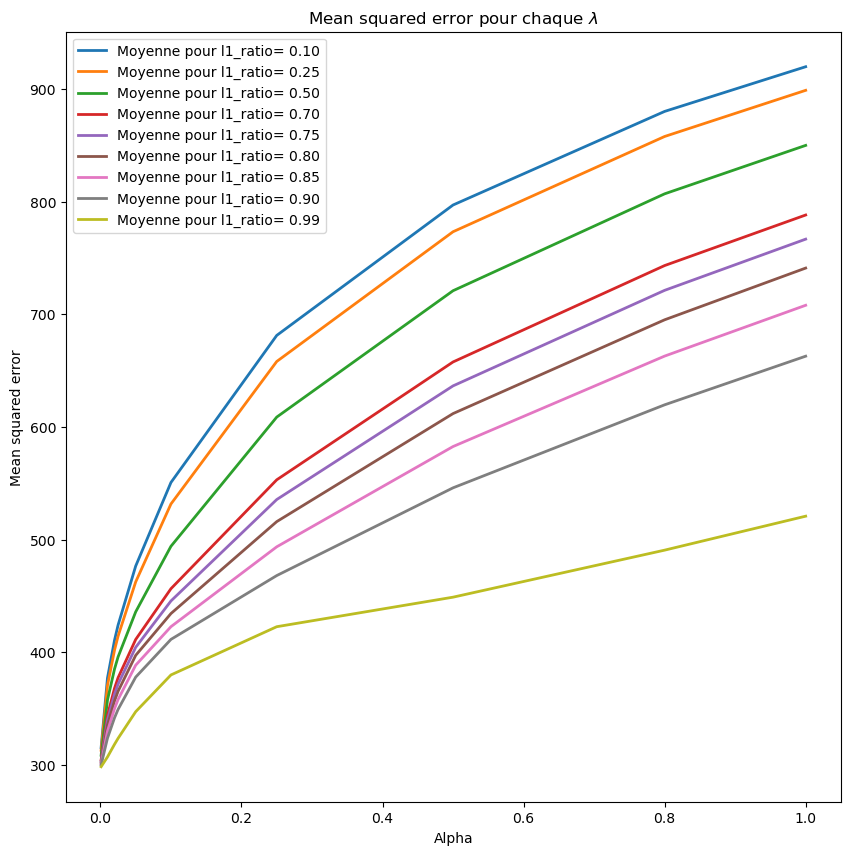

In [136]:
# Affichons dans un graphique, pour chaque valeur de l1_ratio, la courbe représentant la moyenne des erreurs MSE obtenues par validation croisée en fonction des valeurs de 𝛼.

alphas = elast_df_final.alphas_

plt.figure(figsize=(10, 10))

for i in range(elast_df_final.mse_path_.shape[0]) :
    plt.plot(alphas, elast_df_final.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %elast_df_final.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend()

C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14338.454619249096, tolerance: 704.7079771820918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8788.326600972796, tolerance: 686.5346932279909
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12702.886423029238, tolerance: 712.7045661963883
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: 

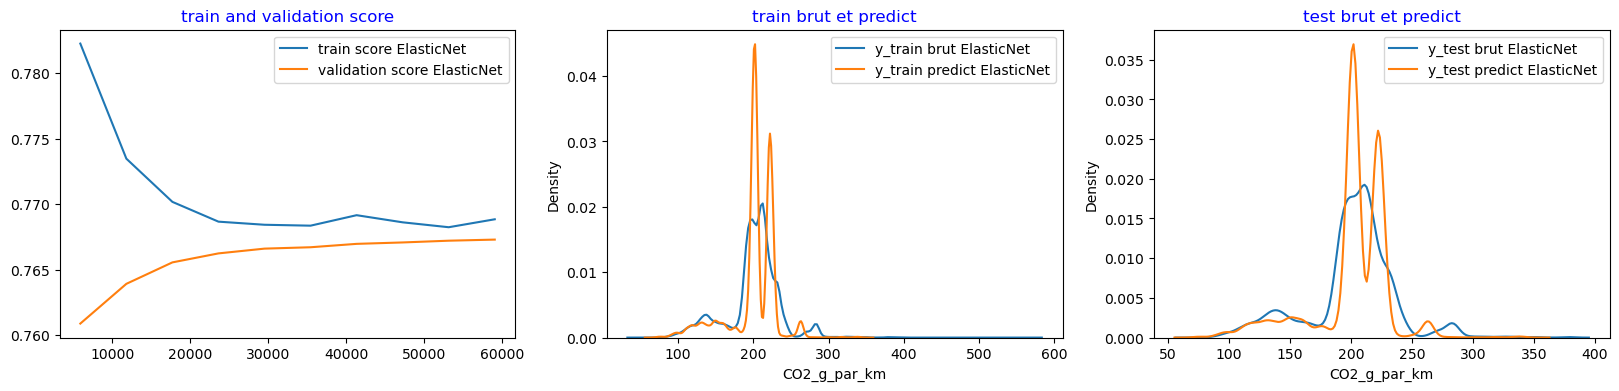

In [138]:
# representation des courbes d'apprentissage

plt.figure(figsize=(20, 4))

plt.subplot(131)

N, train_score_ElasticN, val_score_ElasticN = learning_curve(elast_df_final, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   
#plt.figure(figsize=(8, 4))
plt.plot(N, train_score_ElasticN.mean(axis=1), label='train score ElasticNet')
plt.plot(N, val_score_ElasticN.mean(axis=1), label='validation score ElasticNet')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()

# Calcul

y_train_ElasticNet = pd.DataFrame(elast_pred_train)
y_test_ElasticNet = pd.DataFrame(elast_pred_test)

# Representation entre CO2 predit et CO2 brut
plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut ElasticNet')
sns.distplot(y_train_ElasticNet, hist=False, label='y_train predict ElasticNet')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test brut ElasticNet')
sns.distplot(y_test_ElasticNet, hist=False, label='y_test predict ElasticNet')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()


##### les courbes d'apprentissage du modèle Lasso, Ridge et ElasticNet semblent avoir le même comportement même si les scores sont legèrement différents

#### 3.1.5 Conclusion sur les modèles linéaires

##### Les modèles de Regression Linéaires multiples et pénalisés (Ridge, Lasso, Elastic Net) sont des modèles de régression linéaire tel qu'ils supposent une relation linéaire entre les variables explicatives et la variable cible. Dans cette partie nous avons testé 4 modèles linéaires qui présentent de bons scores proches de 77%, mais qui n'arrivent pas à généraliser correctement sur les échantillons de tests.

##### En réalité il existe d'autres modèles qui ne se basent pas sur cette hypothèse de linéarité mais qui sont aussi adaptés à des problèmes de régression. C'est le cas des modèles Random Forest, KNN, SVM ou XGboost et autres qui feront l'étude de la suite du projet.

### 3.2 Modèles Avancés

#### 3.2.1 Fonction d'évaluation des modèles

##### De même que les modèles de linéaires, nous évaluons nos modèles en utilisant les metrics comme le score, la MSE et les courbes d'apprentissage. Nous avons donc créé une fonction pour évaluer nos modèles en boucle.

In [140]:
def evaluation(model):
    
    
    if model == 'RandomForest':
        
        
        model.fit(X_train, y_train)
        ypred_train_RF = model.predict(X_train)
        ypred_test_RF = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_RF, y_train))
        print('mse test :', mean_squared_error(ypred_test_RF, y_test))
        
        
        y_train_RF = pd.DataFrame(ypred_train_RF)
        y_test_RF = pd.DataFrame(ypred_test_RF)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_RF, val_score_RF = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_RF.mean(axis=1), label='train score RandomForest')
        plt.plot(N, val_score_RF.mean(axis=1), label='validation score RandomForest')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut RandomForest')
        sns.distplot(y_train_RF, hist=False, label='y_train predict RandomForest')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut RandomForest')
        sns.distplot(y_test_RF, hist=False, label='y_test predict RandomForest')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        #print("--------------------------------------------------------------------------------------------------AdaBoost---------------------------------------------------------------------------------------------")        
    elif model == 'AdaBoostRegressor':
        
        model.fit(X_train, y_train)
        ypred_train_AdB = model.predict(X_train)
        ypred_test_AdB = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_AdB, y_train))
        print('mse test :', mean_squared_error(ypred_test_AdB, y_test))
        
    
        y_train_AdB = pd.DataFrame(ypred_train_AdB)
        y_test_AdB = pd.DataFrame(ypred_test_AdB)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_AdB, val_score_AdB = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_AdB.mean(axis=1), label='train score AdaBoost')
        plt.plot(N, val_score_AdB.mean(axis=1), label='validation score AdaBoost')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut AdaBoost')
        sns.distplot(y_train_AdB, hist=False, label='y_train predict AdaBoost')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut AdaBoost')
        sns.distplot(y_test_AdB, hist=False, label='y_test predict AdaBoost')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        
        #print("--------------------------------------------------------------------------------------------------DecisionTreeRegressor---------------------------------------------------------------------------------")        
    elif model == 'DecisionTreeRegressor':
        
                
        model.fit(X_train, y_train)
        ypred_train_DTR = model.predict(X_train)
        ypred_test_DTR = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_DTR, y_train))
        print('mse test :', mean_squared_error(ypred_test_DTR, y_test))
        
        
        y_train_DTR = pd.DataFrame(ypred_train_DTR)
        y_test_DTR = pd.DataFrame(ypred_test_DTR)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_DTR, val_score_DTR = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_DTR.mean(axis=1), label='train score DecisionTreeRegressor')
        plt.plot(N, val_score_DTR.mean(axis=1), label='validation score DecisionTreeRegressor')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut DecisionTreeRegressor')
        sns.distplot(y_train_DTR, hist=False, label='y_train predict DecisionTreeRegressor')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut DecisionTreeRegressor')
        sns.distplot(y_test_DTR, hist=False, label='y_test predict DecisionTreeRegressor')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend() 
        
        #print("-------------------------------------------------------------------------------------------------KNeighborsRegressor-------------------------------------------------------------------------------------")
   
    elif model == 'KNeighborsRegressor':
        
        
        model.fit(X_train, y_train)
        ypred_train_KNN = model.predict(X_train)
        ypred_test_KNN = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_KNN, y_train))
        print('mse test :', mean_squared_error(ypred_test_KNN, y_test))
        
        y_train_KNN = pd.DataFrame(ypred_train_KNN)
        y_test_KNN = pd.DataFrame(ypred_test_KNN)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_KNN, val_score_KNN = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_KNN.mean(axis=1), label='train score KNeighborsRegressor')
        plt.plot(N, val_score_KNN.mean(axis=1), label='validation score KNeighborsRegressor')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut KNeighborsRegressor')
        sns.distplot(y_train_KNN, hist=False, label='y_train predict KNeighborsRegressor')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut KNeighborsRegressor')
        sns.distplot(y_test_KNN, hist=False, label='y_test predict KNeighborsRegressor')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        
        
        #print("-------------------------------------------------------------------------------------------------SGDRegressor-------------------------------------------------------------------------------------------")
   
    elif model == 'SGDRegressor':
        
                
        model.fit(X_train, y_train)
        ypred_train_SGD = model.predict(X_train)
        ypred_test_SGD = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_SGD, y_train))
        print('mse test :', mean_squared_error(ypred_test_SGD, y_test))
        
        
        y_train_SGD = pd.DataFrame(ypred_train_SGD)
        y_test_SGD = pd.DataFrame(ypred_test_SGD)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_SGD, val_score_SGD = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_SGD.mean(axis=1), label='train score SGDRegressor')
        plt.plot(N, val_score_SGD.mean(axis=1), label='validation score SGDRegressor')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut SGDRegressor')
        sns.distplot(y_train_SGD, hist=False, label='y_train predict SGDRegressor')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut SGDRegressor')
        sns.distplot(y_test_SGD, hist=False, label='y_test predict SGDRegressor')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        
        
        #print("---------------------------------------------------------------------------------------------------LinearSVR--------------------------------------------------------------------------------------------")
   
    elif model == 'LinearSVR':
        
        model.fit(X_train, y_train)
        ypred_train_LSVM = model.predict(X_train)
        ypred_test_LSVM = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_LSVM, y_train))
        print('mse test :', mean_squared_error(ypred_test_LSVM, y_test))
        
        
        y_train_LSVM = pd.DataFrame(ypred_train_LSVM)
        y_test_LSVM = pd.DataFrame(ypred_test_LSVM)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_LSVM, val_score_LSVM = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_LSVM.mean(axis=1), label='train score LinearSVR')
        plt.plot(N, val_score_LSVM.mean(axis=1), label='validation score LinearSVR')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut LinearSVR')
        sns.distplot(y_train_LSVM, hist=False, label='y_train predict LinearSVR')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut LinearSVR')
        sns.distplot(y_test_LSVM, hist=False, label='y_test predict LinearSVR')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        #print("------------------------------------------------------------------------------------------------MLPRegressor-------------------------------------------------------------------------------------------")
   
    #elif model == 'MLPRegressor':
    else:
        
        model.fit(X_train, y_train)
        ypred_train_MLP = model.predict(X_train)
        ypred_test_MLP = model.predict(X_test)
        
        print('score train:', model.score(X_train, y_train))
        print('score test:', model.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_MLP, y_train))
        print('mse test :', mean_squared_error(ypred_test_MLP, y_test))
        
       
        y_train_MLP = pd.DataFrame(ypred_train_MLP)
        y_test_MLP = pd.DataFrame(ypred_test_MLP)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_MLP, val_score_MLP = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_MLP.mean(axis=1), label='train score MLPRegressor')
        plt.plot(N, val_score_MLP.mean(axis=1), label='validation score MLPRegressor')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        #plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
        sns.distplot(y_train_MLP, hist=False, label='y_train predict MLPRegressor')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        #plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut MLPRegressor')
        sns.distplot(y_test_MLP, hist=False, label='y_test predict MLPRegressor')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        #plt.legend()      
        #print("------------------------------------------------------------------------------------------------MLPRegressor------------------------------------------------------------------------------------------")
   
   # else:
        #print("----------------------------------------------------------------------------Fin de l'évaluation--------------------------------------------------------------------------------------------------------")

#### 3.2.2 Instanciation des modèles

#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#gallery-examples

In [142]:
RandomForest = RandomForestRegressor(random_state=0) 
AdaBoost =  AdaBoostRegressor(random_state=0) 
DecisionTreeRegressor = DecisionTreeRegressor(random_state=0) 
KNeighborsRegressor = KNeighborsRegressor() 
LinearSVR = LinearSVR() 
SGDRegressor = SGDRegressor() 
MLPRegressor = MLPRegressor(random_state=0)

In [144]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'DecisionTreeRegressor': DecisionTreeRegressor,
                  'KNeighborsRegressor': KNeighborsRegressor,
                  'SGDRegressor': SGDRegressor,
                  'LinearSVR': LinearSVR,
                  'MLPRegressor': MLPRegressor
                 }

#### 3.2.3 Evaluation des modèles

RandomForest
score train: 0.9264120985286333
score test: 0.9101239614215255
mse train : 94.31938432743912
mse test : 115.56998234240669


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:293: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

AdaBoost
score train: 0.5965807011547984
score test: 0.5993922116057208
mse train : 517.0722242662683
mse test : 515.1343535299742


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:293: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

DecisionTreeRegressor
score train: 0.9291323014185706
score test: 0.899631482576749
mse train : 90.83283481733463
mse test : 129.06207226980288


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:293: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

KNeighborsRegressor
score train: 0.8949366532269737
score test: 0.88627557542323
mse train : 134.66222007795537
mse test : 146.23619318470367


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:293: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

SGDRegressor
score train: 0.7651944031681012
score test: 0.771804834283828
mse train : 300.95598443500865
mse test : 293.43206142106123


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut MLPRegressor')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2717007618.py:293: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

LinearSVR


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


score train: 0.7382910231975547
score test: 0.746126979448203
mse train : 335.43869401650767
mse test : 326.45075335364936


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\svm\_clas

MLPRegressor


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


score train: 0.8569717326679194
score test: 0.8610051720511692
mse train : 183.32277244556772
mse test : 178.730950604887


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multi

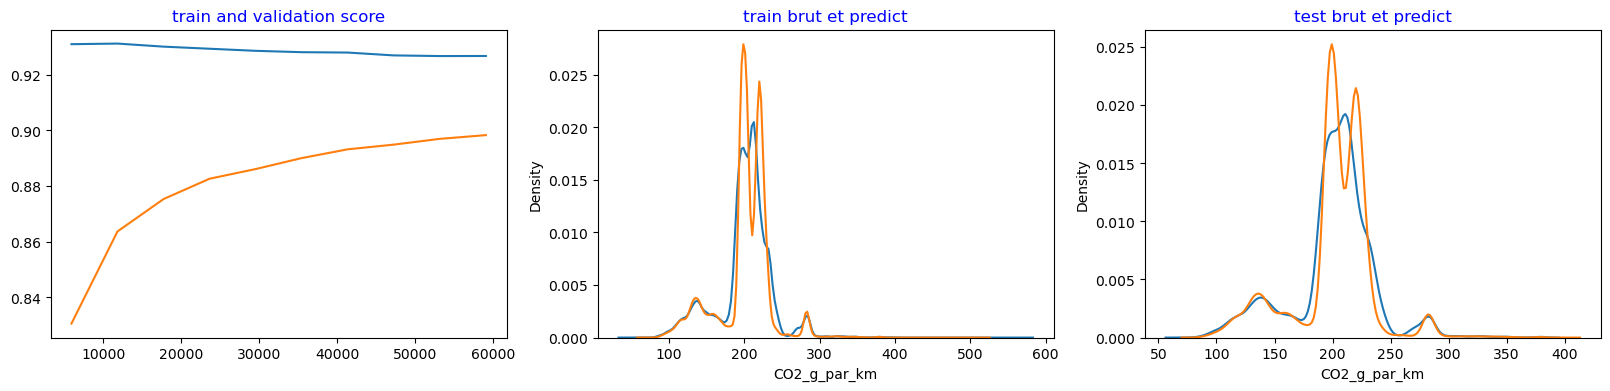

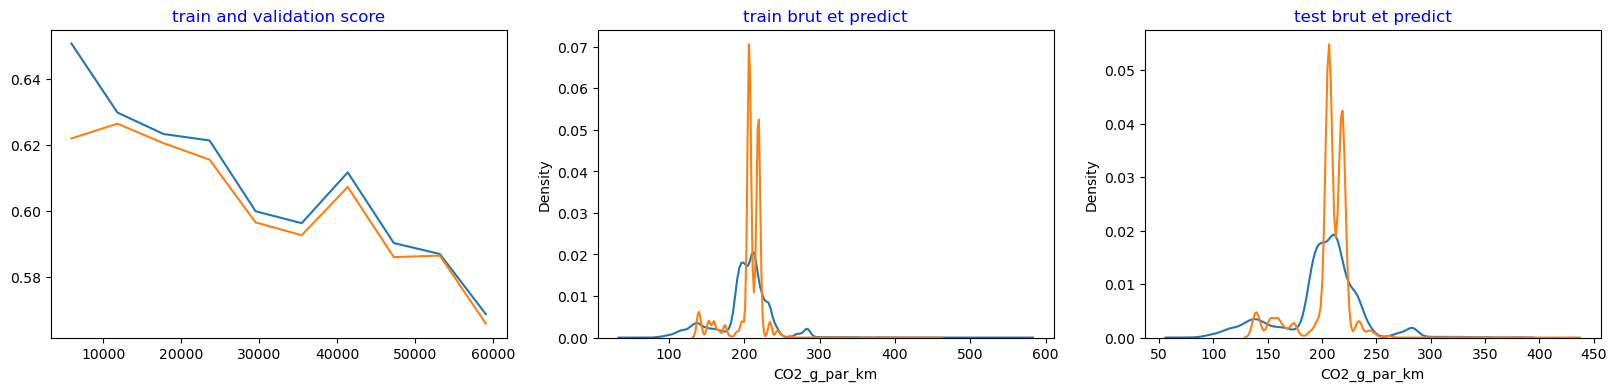

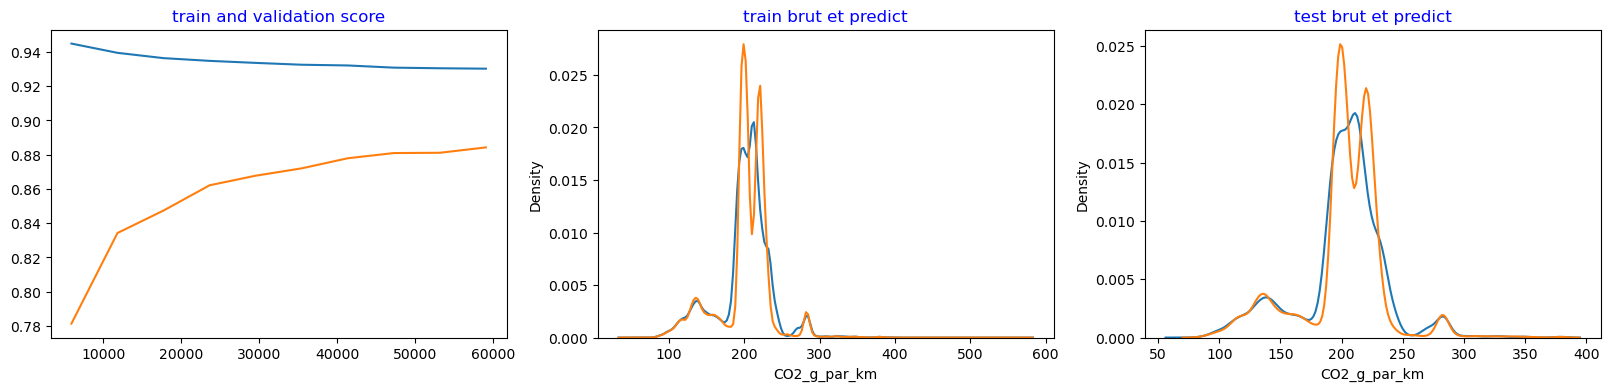

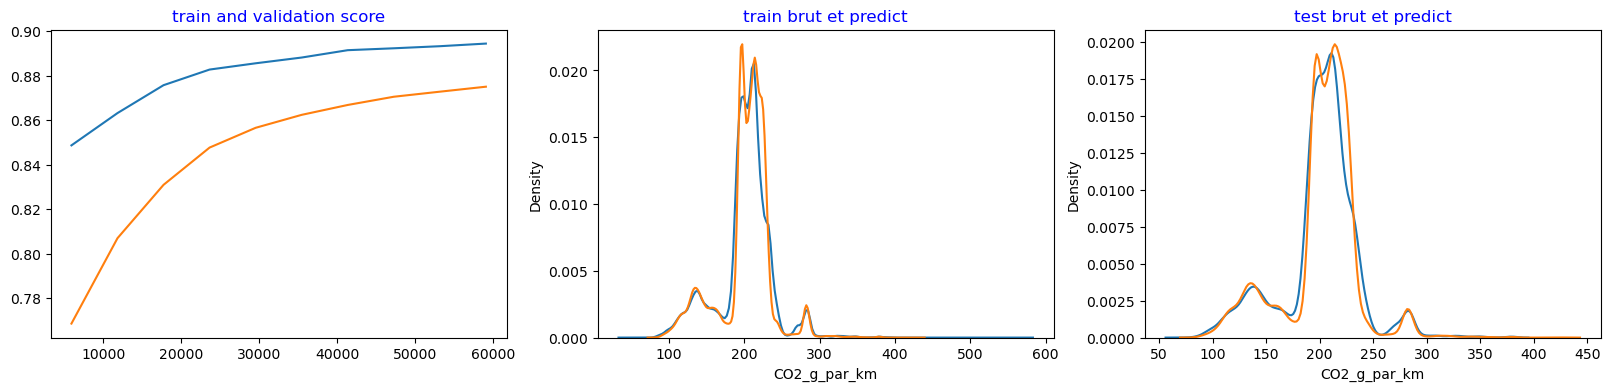

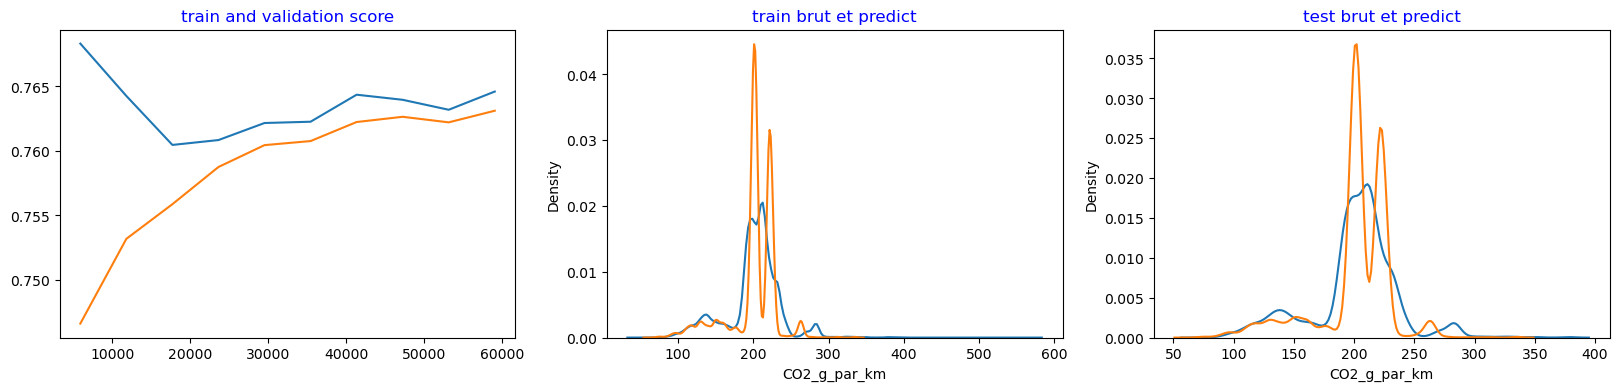

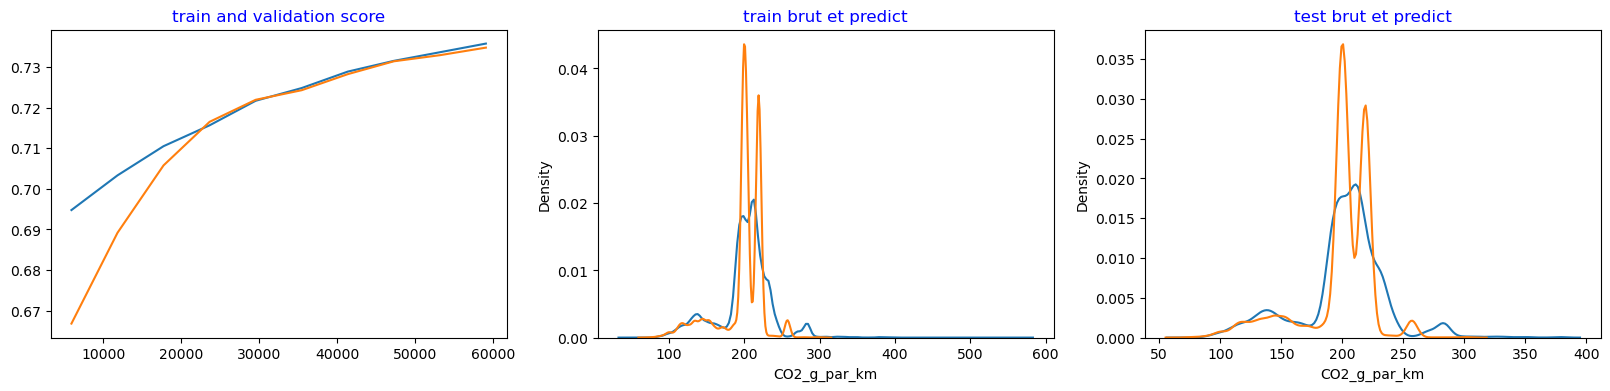

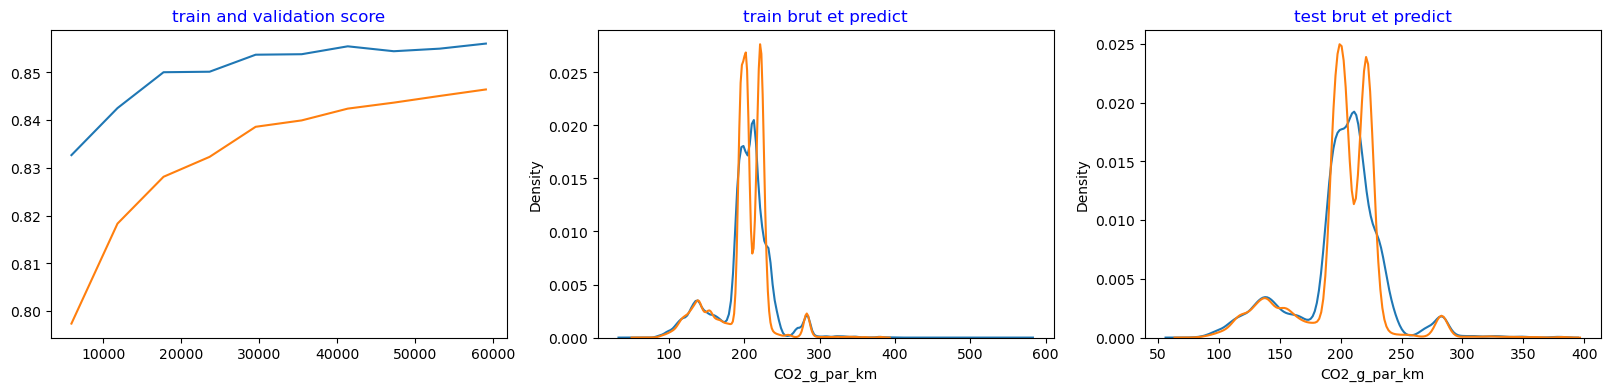

In [146]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

#### 3.2.4 Optimisation de Modèles

##### Dans la partie précédente nous avons testé plusieurs modèles. l'objectif de cette partie etait de voir lequel des modèles à la meilleur performance en terme de score et de stabilité. Les modèles RandomForest (forêt aléatoire), DecisionTree (Arbre de décision) et le KNeighbors (les plus proches voisins) semblent avoir de bon score et en plus, généralisent bien sur les données de train et de test. Nous avons donc choisir le RandomForest et le KNeighbors que nous optimiserons dans cette partie. Dans le but d'obtenir le bon paramètre dans une plus grande plage de données, nous utilisons RandomizedSearchCV adapté egalement aux methodes fit et score. Cette methode utilise la Cross-Validation (validation croisée) pour optimiser les parametres. Elle peut donc rechercher un plus grand nombre d'hyperparamètres sans devenir trop coûteux en termes de calcul, car elle échantillonne les hyperparamètres de l'estimateur de manière aléatoire, donc très efficace sur de grande plage de données contrairement au GridSearchCV qui permet de rechercher un grand nombre d'hyperparamètres, mais elle peut devenir coûteuse en termes de calcul à mesure que le nombre d'hyperparamètres augmente. Après optimisation, le rendomFroest semble resté stable sur ses performances précédentes alors que le KNeighbors est passé de 89% à 90% en terme de performance de validation du test.  

In [149]:
def evaluation_grid(grid):
    
    
    if grid == 'grid_rfr':
        
        
        grid.fit(X_train, y_train)
        ypred_train_grfr = grid.predict(X_train)
        ypred_test_grfr = grid.predict(X_test)
        
        print('score train:', grid.score(X_train, y_train))
        print('score test:', grid.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_grfr, y_train))
        print('mse test :', mean_squared_error(ypred_test_grfr, y_test))
        
        
        y_train_grfr = pd.DataFrame(ypred_train_grfr)
        y_test_grfr = pd.DataFrame(ypred_test_grfr)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_grfr, val_score_grfr = learning_curve(grid, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_grfr.mean(axis=1), label='train score RandomForest grid')
        plt.plot(N, val_score_grfr.mean(axis=1), label='validation score RandomForest grid')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut RandomForest')
        sns.distplot(y_train_grfr, hist=False, label='y_train_grfr predict RandomForest')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut RandomForest')
        sns.distplot(y_test_grfr, hist=False, label='y_test_grfr predict RandomForest')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        #print("--------------------------------------------------------------------------------------------------AdaBoost---------------------------------------------------------------------------------------------")        
   
   
    else: #grid == 'grid_knnr':
        
        grid.fit(X_train, y_train)
        ypred_train_gknnr = grid.predict(X_train)
        ypred_test_gknnr = grid.predict(X_test)
        
        print('score train:', grid.score(X_train, y_train))
        print('score test:', grid.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_gknnr, y_train))
        print('mse test :', mean_squared_error(ypred_test_gknnr, y_test))
        
        
        y_train_gknnr = pd.DataFrame(ypred_train_gknnr)
        y_test_gknnr = pd.DataFrame(ypred_test_gknnr)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_gknnr, val_score_gknnr = learning_curve(grid, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_gknnr.mean(axis=1), label='train score gknnr')
        plt.plot(N, val_score_gknnr.mean(axis=1), label='validation score gknnr')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut Knn')
        sns.distplot(y_train_gknnr, hist=False, label='y_train predict gknn')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut Knn')
        sns.distplot(y_test_gknnr, hist=False, label='y_test predict gknn')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        plt.legend()
        
        #print("------------------------------------------------------------------------------------------------MLPRegressor-------------------------------------------------------------------------------------------")
   
    #elif model == 'MLPRegressor':
    '''
    else:
        
        grid.fit(X_train, y_train)
        ypred_train_gdtr = grid.predict(X_train)
        ypred_test_gdtr = grid.predict(X_test)
        
        print('score train:', grid.score(X_train, y_train))
        print('score test:', grid.score(X_test, y_test))
        print('mse train :', mean_squared_error(ypred_train_gdtr, y_train))
        print('mse test :', mean_squared_error(ypred_test_gdtr, y_test))
        
       
        y_train_gdtr = pd.DataFrame(ypred_train_gdtr)
        y_test_gdtr = pd.DataFrame(ypred_test_gdtr)
        
        
        plt.figure(figsize=(20, 4))

        plt.subplot(131)

        N, train_score_gdtr, val_score_gdtr = learning_curve(grid, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

        plt.plot(N, train_score_gdtr.mean(axis=1), label='train score DecisionTreeClassifier')
        plt.plot(N, val_score_gdtr.mean(axis=1), label='validation score grid DecisionTreeClassifier')
        plt.title("train and validation score", fontdict={"color" : "blue"})
        #plt.legend()

# Representation entre CO2 predit et CO2 brut
        plt.subplot(132)
        sns.distplot(y_train, hist=False, label='y_train brut DecisionTreeClassifier')
        sns.distplot(y_train_gdtr, hist=False, label='y_train grid DecisionTreeClassifier')
        plt.title("train brut et predict", fontdict={"color" : "blue"})
        #plt.legend()

        plt.subplot(133)
        sns.distplot(y_test, hist=False, label='y_test brut DecisionTreeClassifier')
        sns.distplot(y_test_gdtr, hist=False, label='y_test grid DecisionTreeClassifier')
        plt.title("test brut et predict", fontdict={"color" : "blue"})
        #plt.legend()      
        #print("------------------------------------------------------------------------------------------------MLPRegressor------------------------------------------------------------------------------------------")
'''

##### 3.2.4.1 Recherche des meilleurs parametres du RandomFrorest avec RandomizedSearchCV

In [151]:
# recherche des meilleurs parametres du modèle
hyper_params_rfr = {'bootstrap': [True, False],
                   'max_depth': [10,30,50,70,90,110,None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [100, 150, 200]
                  }

# Instanciation de la grid
grid_rfr = RandomizedSearchCV(RandomForest, hyper_params_rfr, n_iter = 100, n_jobs = -1, cv=4, scoring="neg_mean_squared_error") 

# On va ajouter une iteration de 100. c'est à dire combien de fois notre modèle va faire des recherches aléatoires avec tous nos combianaisons

grid_rfr.fit(X_train, y_train) # entrainement de notre grid

print('best params :', grid_rfr.best_params_) # on affiche les meilleurs hyper parametres

#evaluation_grid(grid_rfr.best_estimator_)

C:\Users\tchar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tchar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tchar\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\tchar\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\tchar\anaconda3\lib\site-package

best params : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


##### 3.2.4.2 Recherche des meilleurs parametres du KNeighborsRegressor avec RandomizedSearchCV

In [153]:
# recherche des meilleurs parametres du modèle
hyper_params_knnr = {'n_neighbors': randint(1, 15),
                     'weights': ['uniform', 'distance'],
                     'algorithm': ['ball_tree', 'kd_tree', 'brute']
                    }

# Instanciation de la grid
grid_knnr = RandomizedSearchCV(KNeighborsRegressor, hyper_params_knnr, n_iter = 100, cv=5, scoring='neg_mean_squared_error', random_state=42) 

grid_knnr.fit(X_train, y_train) # entrainement de notre grid

print('best params :', grid_knnr.best_params_) # on affiche les meilleurs hyper parametres

#evaluation_grid(grid_knnr.best_estimator_)

best params : {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'}


##### 3.2.4.3 Evaluation des deux modèles avec les hyperparamètres

In [155]:
dict_of_grids = {'grid_rfr': grid_rfr.best_estimator_,
                 'grid_knnr': grid_knnr.best_estimator_,
                 }

grid_rfr
score train: 0.9259013437425146
score test: 0.9110919058112289
mse train : 94.97403102894546
mse test : 114.32532005203691


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2021881003.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Knn')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2021881003.py:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

grid_knnr
score train: 0.9238841563996023
score test: 0.9037814341694442
mse train : 97.55950859322452
mse test : 123.7257241187786


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2021881003.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Knn')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2021881003.py:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

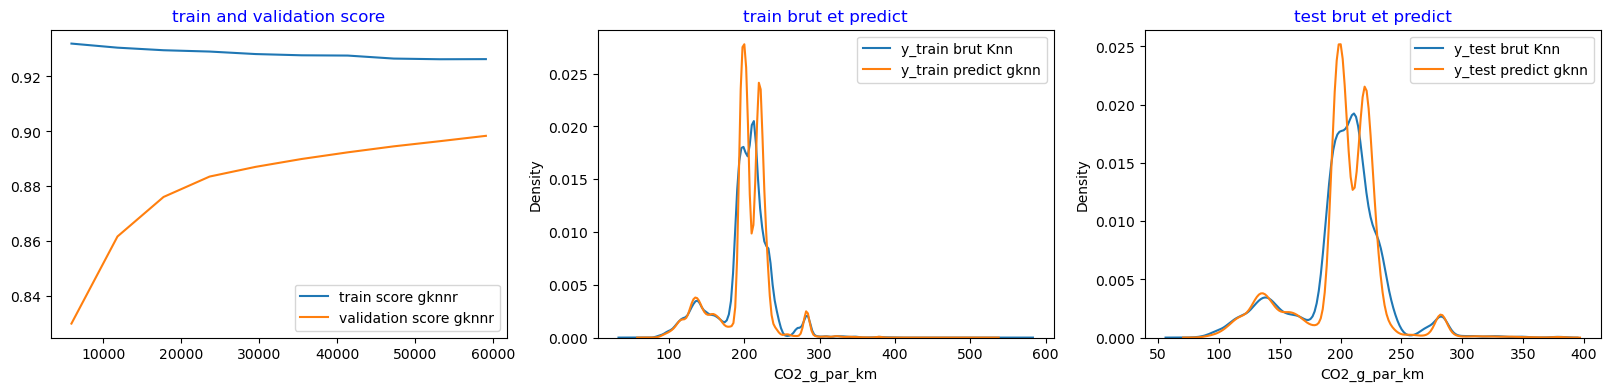

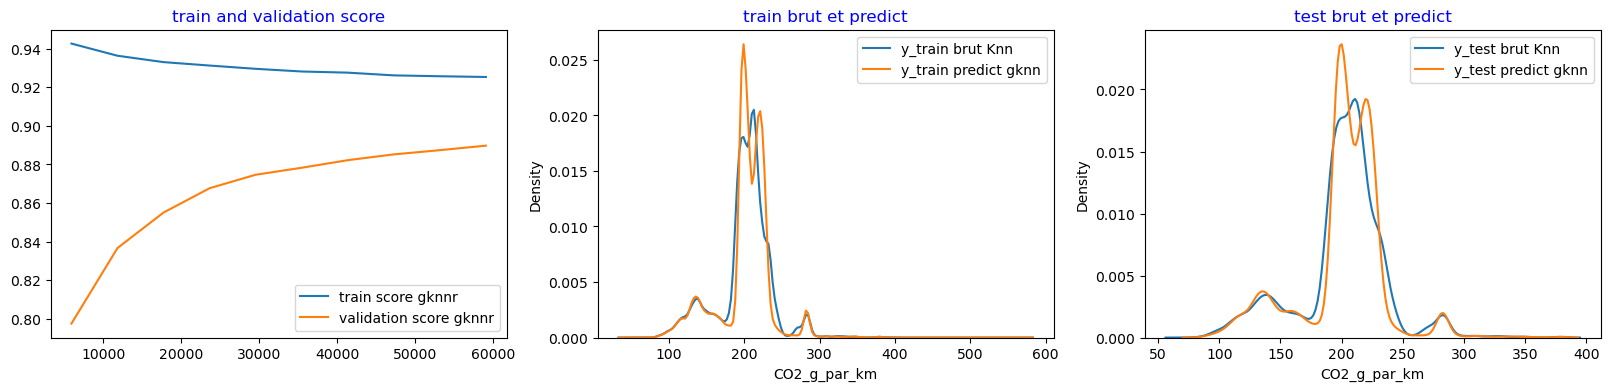

In [156]:
for name, grid in dict_of_grids.items():
    print(name)
    evaluation_grid(grid)

#### 3.2.5 Utilisation de techniques d'ensemble learning : Bagging & Boosting

##### L'idée du **bagging**, c'est de créer plusieurs entité d'un même modèle (par exemple plusieurs arbres de décision) et d'entrainer chacune de ces entités sur une portion aléatoire de notre dataset. Pour ça, on utilise une technique d'échantillonnage appélé bootstrapping et qui consiste à replacer après chaque tirage au sort les données qui ont été selectionnées dans notre dataset. De cette manière, on obtient une foule de modèles diversifiés puisqu'ils n'ont pas été tous nourris d'un même données mais qui partagent quand même certaines connaissances en commun et ça, c'est très important pour obtenir des majorités en faveur des bonnes reponses. Une fois qu'on à cette foule, on peut donc regrouper les resultats de chaque modèle pour faire notre prédiction finale. Voilà donc en quelques mots ce qui est le bagging. Et l'exemple d'algorithme le plus connu est celui de << Random Forest >> que nous avons déjà utilisé et optimisé avec un nombre d'estimateur de 100. Dans l'optimisation de nos modèles nous avons constaté que le RendomForest et le KNN donnaient de très bons scores. Nous testerons ces modèles comme base d'estimateur dans l'utilisation de l'algorithme de bagging.

##### Une autre manière d'obtenir des ensembles de modèles qui soient diversifiés est d'utiliser une technique appélée **Boosting**. Cette fois ci, l'idée est d'entrainer l'un après l'autre, plusieurs modèles relativement faible en demandant à chaque modèle d'essayer de corriger les erreurs effectuées par son prédécesseur. Du coup, on obtient un ensemble de modèle parfaitement complementaires dans lequel les faiblesses des uns sont compensées par les forces des autres et pour faire ça, il existe deux grands algorithmes qui sont << AdaBoost >> et << Grandient Boosting >>. Nous avons déjà testé le modèle Adaboost avec un score de 58%. Dans cette partie d'optimisation nous utiliserons l'algorithme << Grandient Boosting >>.

##### **En résumé**: Dans le but d'optimiser encore nos modèle, nous utilisons dans cette partie les modèle d'ensemble learning (Bagging et Boosting) avec KNN et Adaboost comme Regressor d'ensemble. Dans le cas du Bagging avec le Regressor KNN, nous avons un scpore nettement moins que ce que nous avons obtenu par optimisation des parametres. Sans doute par ce que nous avons utilisé comme seul parametre le nombre d'estimateurs. Dans le cadre du Bossting, nous avons utiliser comme Regressor GradientBoosting comme estimateur avec un score de 89%. Ce score reste un très bon score puisquil est proche des score de 90% obtenus avec RandomForest, KNN et l'Arbre de Décision.

##### 3.2.5.1 Bagging

score train: 0.9110878789282171
score test: 0.9006367100095461
mse train : 113.96080539136396
mse test : 127.76946838454114


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2569898721.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Bagging KNN')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\2569898721.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

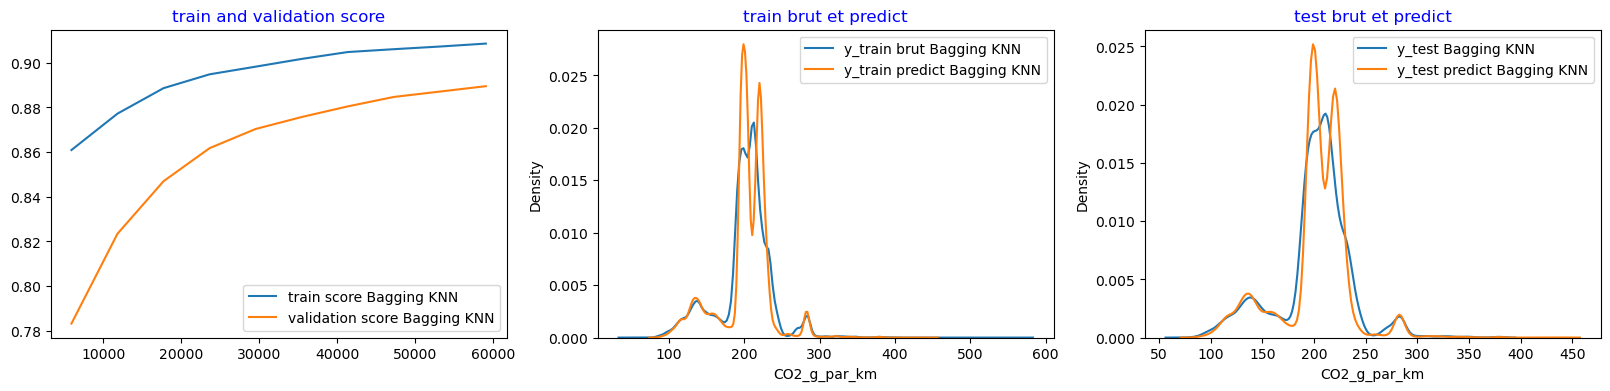

In [160]:
#KNei_R = KNeighborsRegressor(random_state = 42)

Bagg_KnnR = BaggingRegressor(estimator = KNeighborsRegressor, n_estimators=100, random_state=0) 

Bagg_KnnR.fit(X_train, y_train)
ypred_train_Bagg_KnnR = Bagg_KnnR.predict(X_train)
ypred_test_Bagg_KnnR = Bagg_KnnR.predict(X_test)
        
print('score train:', Bagg_KnnR.score(X_train, y_train))
print('score test:', Bagg_KnnR.score(X_test, y_test))
print('mse train :', mean_squared_error(ypred_train_Bagg_KnnR, y_train))
print('mse test :', mean_squared_error(ypred_test_Bagg_KnnR, y_test))
        
        
y_train_Bagg_KnnR = pd.DataFrame(ypred_train_Bagg_KnnR)
y_test_Bagg_KnnR = pd.DataFrame(ypred_test_Bagg_KnnR)
        
        
plt.figure(figsize=(20, 4))

plt.subplot(131)

N, train_score_Bagg_KnnR, val_score_Bagg_KnnR = learning_curve(Bagg_KnnR, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

plt.plot(N, train_score_Bagg_KnnR.mean(axis=1), label='train score Bagging KNN')
plt.plot(N, val_score_Bagg_KnnR.mean(axis=1), label='validation score Bagging KNN')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut Bagging KNN')
sns.distplot(y_train_Bagg_KnnR, hist=False, label='y_train predict Bagging KNN')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test Bagging KNN')
sns.distplot(y_test_Bagg_KnnR, hist=False, label='y_test predict Bagging KNN')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()

##### 3.2.5.2 Boosting

score train: 0.8890217100223005
score test: 0.8864226481118589
mse train : 142.24354513603748
mse test : 146.04707505826286


C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\3498687862.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label='y_train brut Boosting Gradboost')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_65984\3498687862.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either 

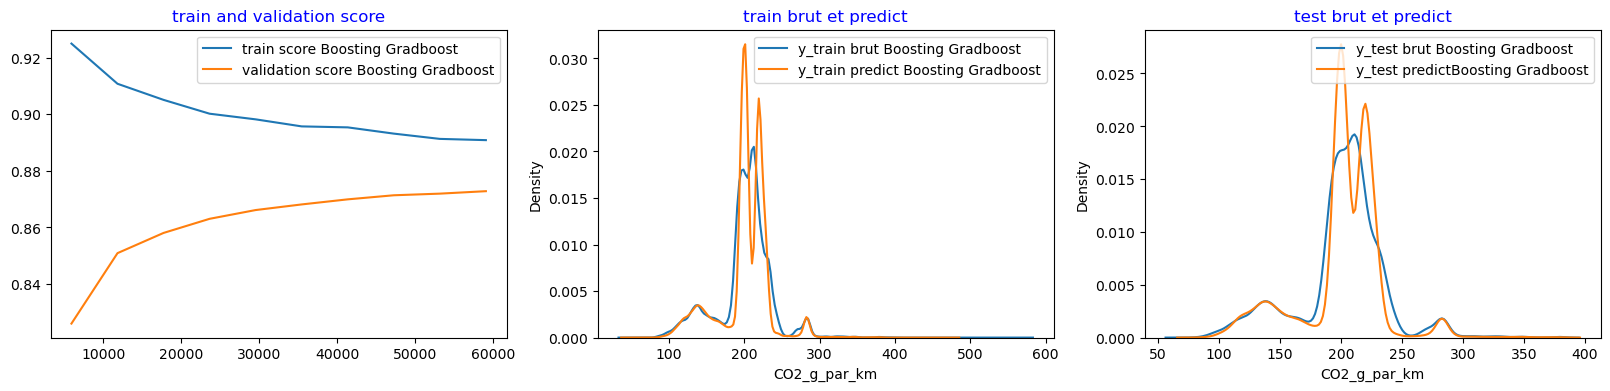

In [163]:
Boost_GbR = GradientBoostingRegressor(n_estimators=2000, random_state=0)

Boost_GbR.fit(X_train, y_train)
ypred_train_Boost_GbR = Boost_GbR.predict(X_train)
ypred_test_Boost_GbR = Boost_GbR.predict(X_test)
        
print('score train:', Boost_GbR.score(X_train, y_train))
print('score test:', Boost_GbR.score(X_test, y_test))
print('mse train :', mean_squared_error(ypred_train_Boost_GbR, y_train))
print('mse test :', mean_squared_error(ypred_test_Boost_GbR, y_test))
        
        
y_train_Boost_GbR = pd.DataFrame(ypred_train_Boost_GbR)
y_test_Boost_GbR = pd.DataFrame(ypred_test_Boost_GbR)
        
        
plt.figure(figsize=(20, 4))

plt.subplot(131)

N, train_score_Boost_GbR, val_score_Boost_GbR = learning_curve(Boost_GbR, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))   

plt.plot(N, train_score_Boost_GbR.mean(axis=1), label='train score Boosting Gradboost')
plt.plot(N, val_score_Boost_GbR.mean(axis=1), label='validation score Boosting Gradboost')
plt.title("train and validation score", fontdict={"color" : "blue"})
plt.legend()


plt.subplot(132)
sns.distplot(y_train, hist=False, label='y_train brut Boosting Gradboost')
sns.distplot(y_train_Boost_GbR, hist=False, label='y_train predict Boosting Gradboost')
plt.title("train brut et predict", fontdict={"color" : "blue"})
plt.legend()

plt.subplot(133)
sns.distplot(y_test, hist=False, label='y_test brut Boosting Gradboost')
sns.distplot(y_test_Boost_GbR, hist=False, label='y_test predictBoosting Gradboost')
plt.title("test brut et predict", fontdict={"color" : "blue"})
plt.legend()

#### 3.2.6 Interpratabilité - Features importances

##### Dans cette partie il s'agit de connaitre les variables qui ont plus d'influence sur les modèles. Nous avons choisi les modèles qui ont de bon score et stables sur les données de train et de test. Il s'agit des modèles RandomFroest, l'arbre de décision, KNN et GradientBoosting. Nous constatons que les modèles RandomFroest, l'arbre de décision et GradientBoosting accordent beaucoup d'importance à la variable Carosserie_MINIBUS par rapport aux autres variables comme on peut le vois sur les figures ci-dessous. Parmi ces trois modèle, le randomForest semble avoir plus de considerartion pour les autres variables par rapport à l'arbre de décision et au GradientBoosting.

##### Le modèle KNN n'ayant pas la fonction feature_importance, nous avons utilisé la methode Permutation feature importance qui est une technique d'inspection des modèles qui mesure la contribution de chaque caractéristique à la performance statistique d'un modèle ajusté sur un ensemble de données tabulaires donné. Cette technique est particulièrement utile pour les estimateurs non linéaires ou opaques. Elle consiste à mélanger aléatoirement les valeurs d'une caractéristique unique et à observer la dégradation du score du modèle qui en résulte. Après application de cette methode, nous constatons que contrairement aux modèles RandomForest, ArbreDeDecision et GradientBoosting qui apportent plus d'importance à la variable "Carosserie_MINIBUS", le KNN apporte plus d'importance aux variables ""PuissanceMaximale"" et "" masseVideEuroMax"".

##### Cette partie peut être également utiliser pour faire de la selection de variables soit en négligeant à partir d'un certain seuil des variables. Mais, nous preferons laisser notre modèle dans le but de conserver nos 8 features dans le modèle.

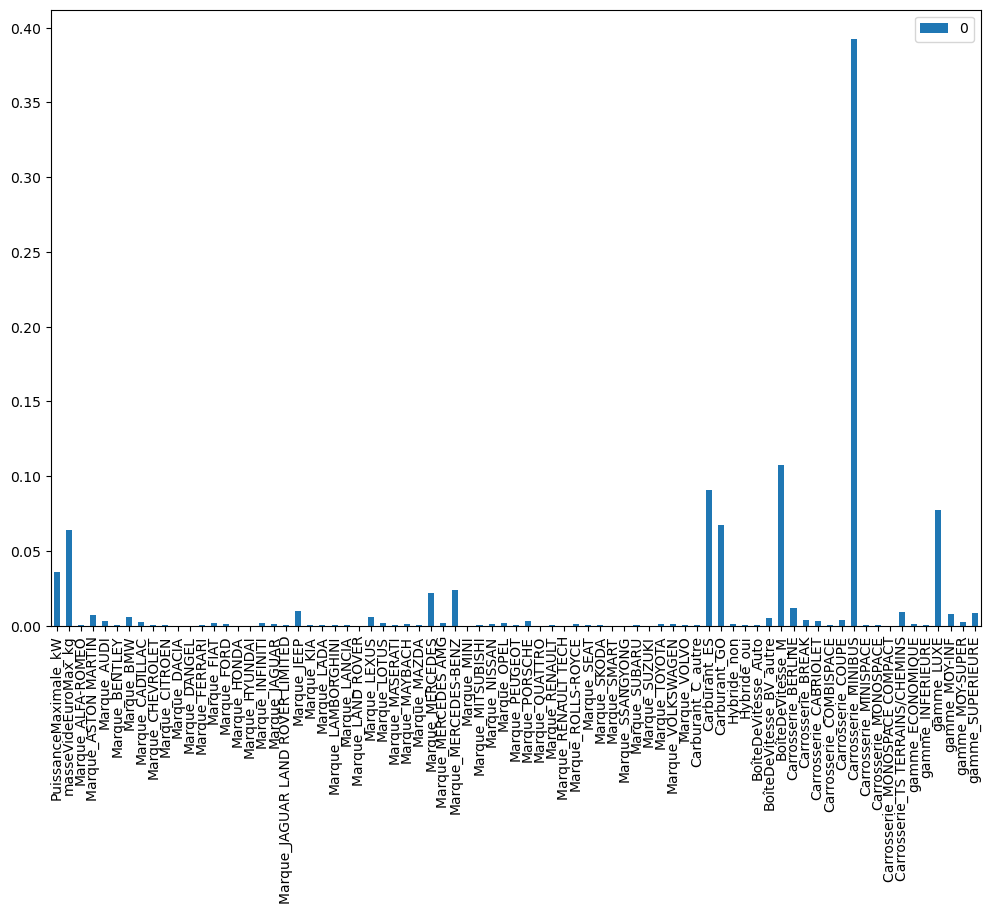

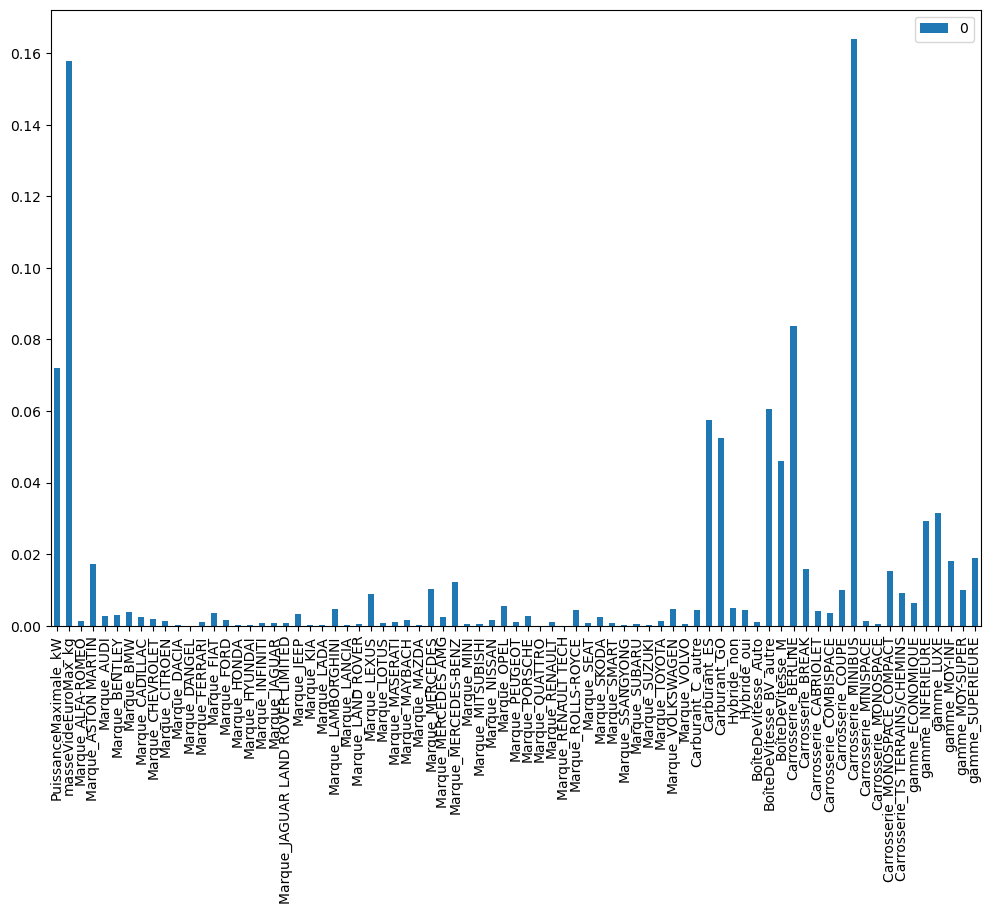

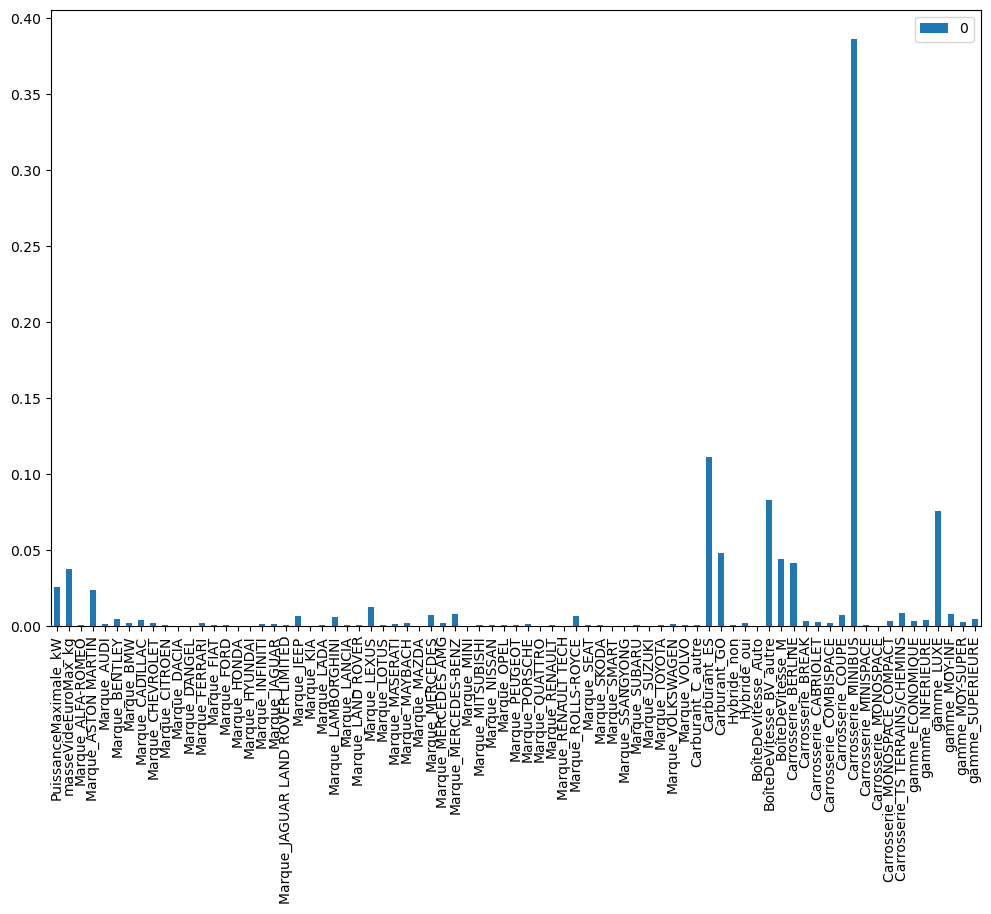

In [166]:
dict_of_Features = {'DecisionTreeRegressor': DecisionTreeRegressor,
                    'grid_rfr': grid_rfr.best_estimator_,
                    'Boost_GbR': Boost_GbR,
                   }
for name, feature in dict_of_Features.items():
    #pd.DataFrame(feature.feature_importances_, index=X_train.columns)
    pd.DataFrame(feature.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [167]:
pd.DataFrame(DecisionTreeRegressor.feature_importances_, index=X_train.columns) # Arbre de décision

,0
PuissanceMaximale_kW,3.605051e-02
masseVideEuroMax_kg,6.371083e-02
Marque_ALFA-ROMEO,4.907589e-04
Marque_ASTON MARTIN,7.132957e-03
Marque_AUDI,3.115628e-03
Marque_BENTLEY,4.844098e-04
Marque_BMW,5.788416e-03
Marque_CADILLAC,2.632516e-03
Marque_CHEVROLET,2.602770e-04
Marque_CITROEN,3.314879e-04


In [168]:
pd.DataFrame(grid_rfr.best_estimator_.feature_importances_, index=X_train.columns) # Random Forest Optimisé

,0
PuissanceMaximale_kW,0.071916
masseVideEuroMax_kg,0.157753
Marque_ALFA-ROMEO,0.001232
Marque_ASTON MARTIN,0.017166
Marque_AUDI,0.002565
Marque_BENTLEY,0.003066
Marque_BMW,0.003875
Marque_CADILLAC,0.002463
Marque_CHEVROLET,0.001923
Marque_CITROEN,0.001272


In [169]:
pd.DataFrame(Boost_GbR.feature_importances_, index=X_train.columns) # Gradient Boosting

,0
PuissanceMaximale_kW,0.025268
masseVideEuroMax_kg,0.037106
Marque_ALFA-ROMEO,0.000721
Marque_ASTON MARTIN,0.023403
Marque_AUDI,0.000939
Marque_BENTLEY,0.004629
Marque_BMW,0.001709
Marque_CADILLAC,0.003722
Marque_CHEVROLET,0.001940
Marque_CITROEN,0.000186


Feature: 0, Score: 223.92680
Feature: 1, Score: 313.95008
Feature: 2, Score: 0.63290
Feature: 3, Score: 8.25636
Feature: 4, Score: 7.21109
Feature: 5, Score: 1.87722
Feature: 6, Score: 8.24546
Feature: 7, Score: 3.49416
Feature: 8, Score: 0.81239
Feature: 9, Score: 1.02778
Feature: 10, Score: 0.11728
Feature: 11, Score: 0.03439
Feature: 12, Score: 0.25690
Feature: 13, Score: 2.26285
Feature: 14, Score: 1.47286
Feature: 15, Score: 0.35903
Feature: 16, Score: 0.15088
Feature: 17, Score: 0.68455
Feature: 18, Score: 1.45065
Feature: 19, Score: 0.45816
Feature: 20, Score: 1.56980
Feature: 21, Score: 0.21521
Feature: 22, Score: 0.29620
Feature: 23, Score: 1.57804
Feature: 24, Score: 0.29085
Feature: 25, Score: 0.18188
Feature: 26, Score: 2.67809
Feature: 27, Score: 0.97844
Feature: 28, Score: 0.71162
Feature: 29, Score: 0.65170
Feature: 30, Score: 0.19518
Feature: 31, Score: 29.24765
Feature: 32, Score: 1.32180
Feature: 33, Score: 32.71783
Feature: 34, Score: 0.31739
Feature: 35, Score: 0.56

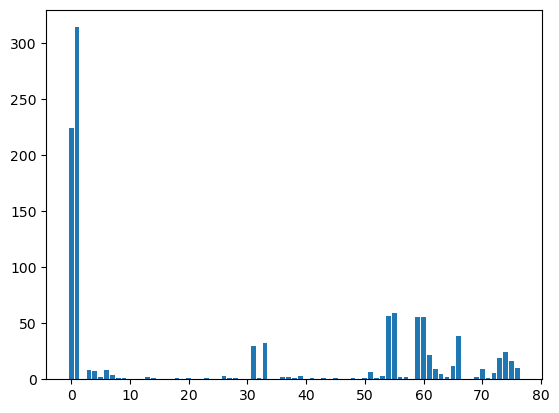

In [171]:
results = permutation_importance(grid_knnr.best_estimator_,X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
plt.bar([x for x in range(len(importance))], importance)
plt.show()